## Employee performance Rating

### Business case:
 - To predict the performance rating of each employee based on various factors

## Domain analyis:

- EmpNumber: id or unique number given to each employee working in the organization
- Age: age of each employee
- Gender: gender of each employee
- EducationBackground: educational background of the employee
- MaritalStatus: Describes whether the candidate is married,single or divorced
- EmpDepartment: Describes on what department the employee is working
- EmpJobRole: Describes the job role of the employee in the organization
- BusinessTravelFrequency: gives information on  Whether the employee travels frequently or rarely or does not travel at all
- DistanceFromHome: How many kilometers the employee travels daily from home to office
- EmpEducationLevel: How well is the employee educated
- EmpEnvironmentSatisfaction: Gives information about the level of satisfaction with environment by the employee
- EmpHourlyRate: How much the employee is paid on a hourly basis
- EmpJobInvolvement: Level of involvement in job by the employee
- EmpJobLevel: Explains the level of job of the employee
- EmpJobSatisfaction: Explains the level of satisfaction of job by the employee
- NumCompaniesWorked: How many companies has the employee worked with so far
- OverTime: Is the employee willing to do overtime or not
- EmpLastSalaryHikePercent: Explains about how much percent is the salary hiked 
- EmpRelationshipSatisfaction: Explains if the employee is satisfied with work relationships
- TotalWorkExperienceInYears: Overall work experience of the employee in the particular domain
- TrainingTimesLastYear: How many times the employee has been trained last year
- EmpWorkLifeBalance: How well the employee is able to manage life and work
- ExperienceYearsAtThisCompany: How many years the employee is working at the current company
- ExperienceYearsInCurrentRole: How many years the employee is working in current job role
- YearsSinceLastPromotion: Before how many years the employee was given a promotion
- YearsWithCurrManager: How many years the employee is working with current manager
- Attrition: Describes whether the employee has left the organization or not
- PerformanceRating: The target column to be predicted (rating of employee based on above given features)

## Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

## Basic checks

In [3]:
# display first five rows of the data
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
# display last five rows of the data
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [5]:
#gives about the memory usage occupied by the data and also how many values are not null in each column and the data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
# gives statisticalinformation for numerical columns
data.describe().T

count       mean        std   min   25%   50%  \
Age                           1200.0  36.918333   9.087289  18.0  30.0  36.0   
DistanceFromHome              1200.0   9.165833   8.176636   1.0   2.0   7.0   
EmpEducationLevel             1200.0   2.892500   1.044120   1.0   2.0   3.0   
EmpEnvironmentSatisfaction    1200.0   2.715833   1.090599   1.0   2.0   3.0   
EmpHourlyRate                 1200.0  65.981667  20.211302  30.0  48.0  66.0   
EmpJobInvolvement             1200.0   2.731667   0.707164   1.0   2.0   3.0   
EmpJobLevel                   1200.0   2.067500   1.107836   1.0   1.0   2.0   
EmpJobSatisfaction            1200.0   2.732500   1.100888   1.0   2.0   3.0   
NumCompaniesWorked            1200.0   2.665000   2.469384   0.0   1.0   2.0   
EmpLastSalaryHikePercent      1200.0  15.222500   3.625918  11.0  12.0  14.0   
EmpRelationshipSatisfaction   1200.0   2.725000   1.075642   1.0   2.0   3.0   
TotalWorkExperienceInYears    1200.0  11.330000   7.797228   0.0   6.0  10.0   
TrainingTimesLastYear         1200.0   2.785833   1.263446   0.0   2.0   3.0   
EmpWorkLifeBalance            1200.0   2.744167   0.699374   1.0   2.0   3.0   
ExperienceYearsAtThisCompany  1200.0   7.077500   6.236899   0.0   3.0   5.0   
ExperienceYearsInCurrentRole  1200.0   4.291667   3.613744   0.0   2.0   3.0   
YearsSinceLastPromotion       1200.0   2.194167   3.221560   0.0   0.0   1.0   
YearsWithCurrManager          1200.0   4.105000   3.541576   0.0   2.0   3.0   
PerformanceRating             1200.0   2.948333   0.518866   2.0   3.0   3.0   

                               75%    max  
Age                           43.0   60.0  
DistanceFromHome              14.0   29.0  
EmpEducationLevel              4.0    5.0  
EmpEnvironmentSatisfaction     4.0    4.0  
EmpHourlyRate                 83.0  100.0  
EmpJobInvolvement              3.0    4.0  
EmpJobLevel                    3.0    5.0  
EmpJobSatisfaction             4.0    4.0  
NumCompaniesWorked             4.0    9.0  
EmpLastSalaryHikePercent      18.0   25.0  
EmpRelationshipSatisfaction    4.0    4.0  
TotalWorkExperienceInYears    15.0   40.0  
TrainingTimesLastYear          3.0    6.0  
EmpWorkLifeBalance             3.0    4.0  
ExperienceYearsAtThisCompany  10.0   40.0  
ExperienceYearsInCurrentRole   7.0   18.0  
YearsSinceLastPromotion        3.0   15.0  
YearsWithCurrManager           7.0   17.0  
PerformanceRating              3.0    4.0

In [7]:
# statistical information including categorical columns
data.describe(include='O').T

count unique              top  freq
EmpNumber                1200   1200         E1001000     1
Gender                   1200      2             Male   725
EducationBackground      1200      6    Life Sciences   492
MaritalStatus            1200      3          Married   548
EmpDepartment            1200      6            Sales   373
EmpJobRole               1200     19  Sales Executive   270
BusinessTravelFrequency  1200      3    Travel_Rarely   846
OverTime                 1200      2               No   847
Attrition                1200      2               No  1022

- maximum employees are males who are married
- maximum employees are from sales department who are sales executives
- maximum of employees do travel rarely 
- maximum of employees do not work overtime

In [8]:
# number of rows and columns
data.shape

(1200, 28)

In [9]:
# columns in the given data
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [10]:
#check if any duplicate values in the data
data.duplicated().sum()

0

In [11]:
#check if any value is null in the given data
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- There are no null values and duplicated values in the given data

In [12]:
# check for data types in the given data
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

## Exploratory data analysis

#### univariate

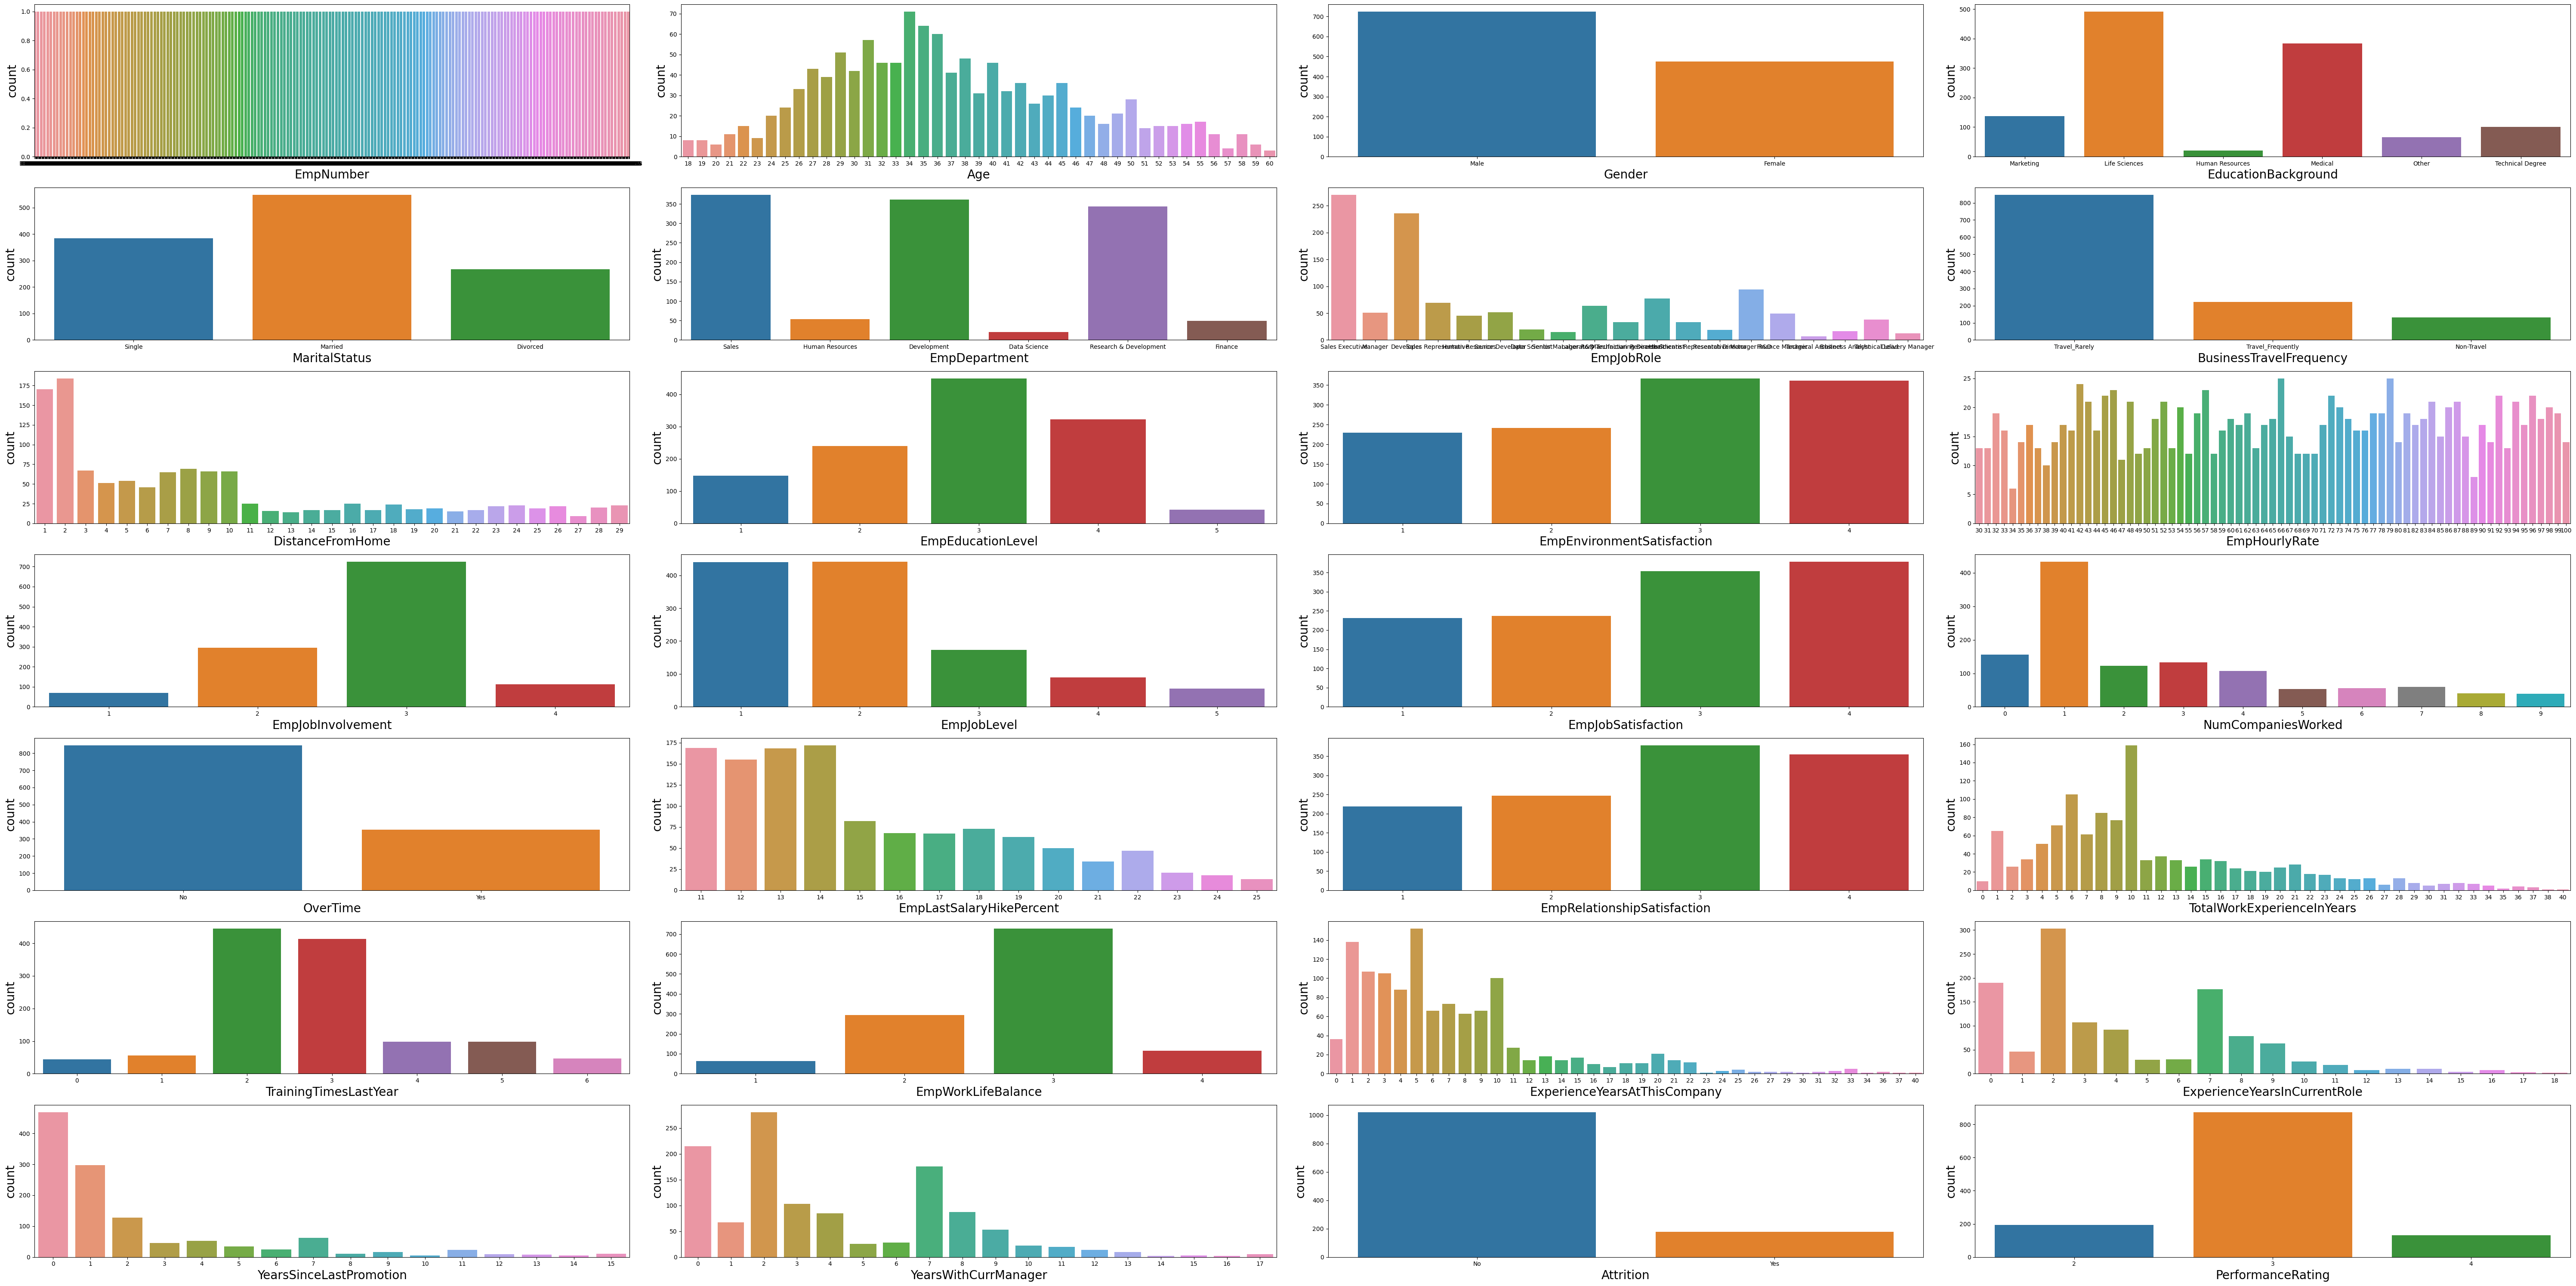

In [13]:
plt.figure(figsize=(60,30),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<29:
        ax= plt.subplot(7,4,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize='20')
        plt.ylabel('count',fontsize='20')
    plotnumber+=1
plt.tight_layout()
        

- Most of employees are aged from 40 years to 60 years
- Most of the employees are Males
- There are more number of male employees in comparison with female employees
- Most of the employees are from life sciences and medical
- Most of the employees are married
- Most of the employees are from sales ,development ,research and development
- Most of employees are sales exceutives
- Most of the employees travel rarely
- Most of the employees travel only 1 to 2 kms from home
- 450 peopele are highly educated
- About 350 people are highly satisfied with their environment
- About 700 people are modetely invovled in job
- About 10% of people have a very high job involvement
- Most of the employees are juniors or entry level employees 
- About 350 and above people are highly satisfied with their job 
- Most of the employees worked with only 1 company about 10% of employees worked with 9 companies
- Most of employees are not willing to work overtime
- 155 and above employees have got 11-15 % increment 
- About 300 and above no of employees are satisfied with their jobs
- Most of the employees have about 10 years of work experience
- About 350 to 400 employees required 2 to 3 times of training
- About 700 people have an avarage work life balance
- Most of the people are working in the same organisation for 5 years
- Very few people have work experience in the same role
- About 300 people were recently promoted
- Most people have worked with the same manager for above two years
- Very few employees have been exposed to attrition

### Bivariate

<AxesSubplot:xlabel='Age', ylabel='PerformanceRating'>

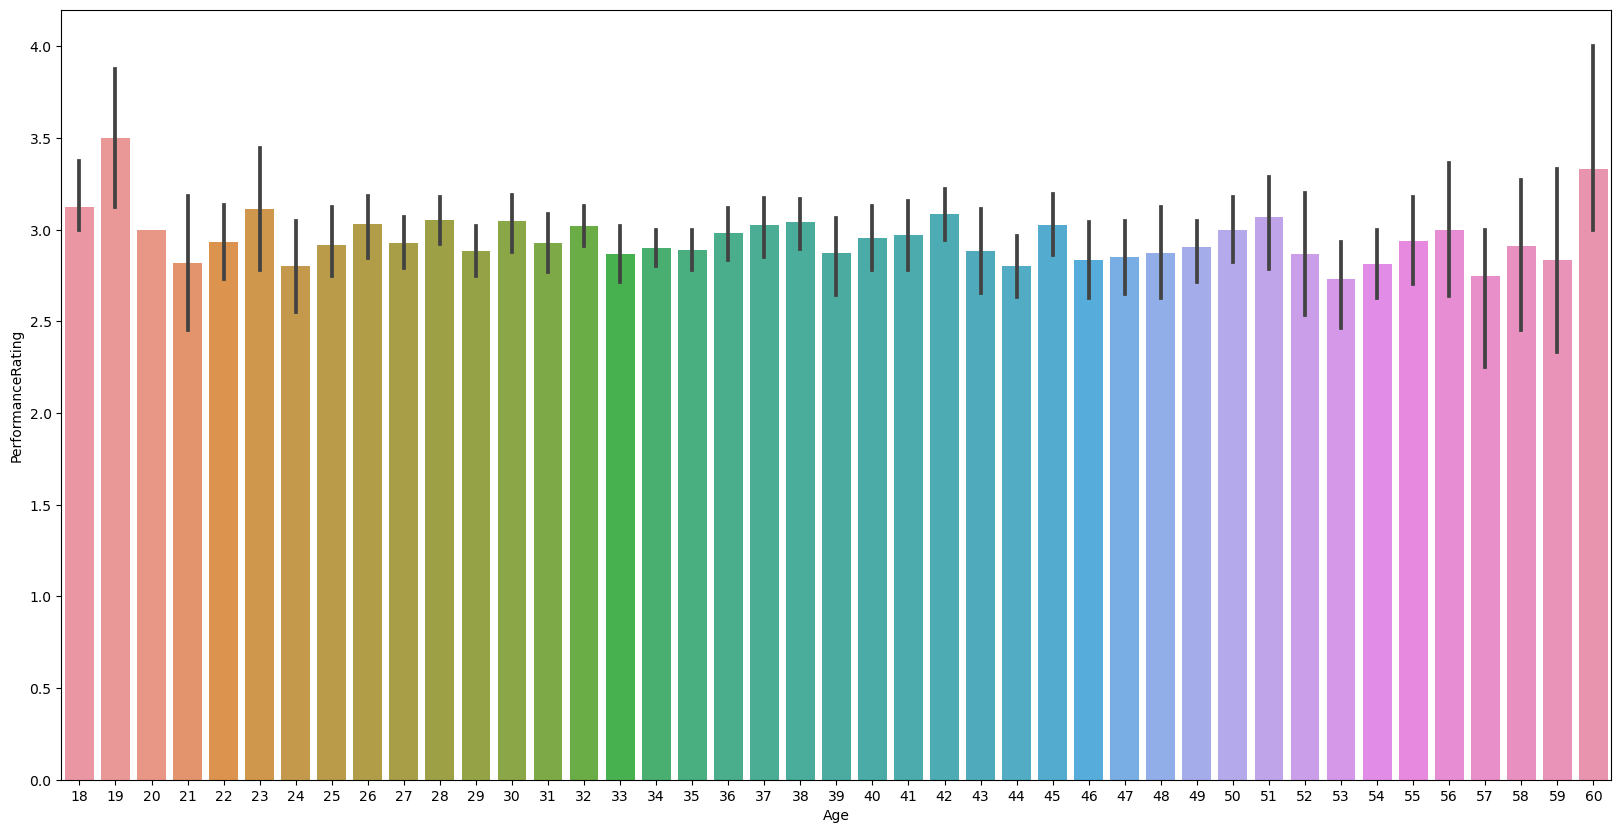

In [14]:
#comparison with age and Performance rating
plt.figure(figsize=(20,10))
sns.barplot(x=data['Age'],y=data['PerformanceRating'])

- The top rated employees are aged 19 years of age
- The least rated employees are aged 53 and 57

<AxesSubplot:xlabel='Gender', ylabel='PerformanceRating'>

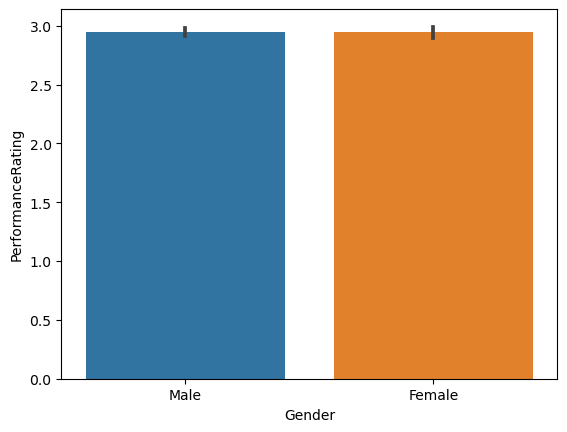

In [15]:
# comparison of performance rating with Gender
sns.barplot(x=data['Gender'],y=data['PerformanceRating'])

- Gender does not have an effect on Performance rating

<AxesSubplot:xlabel='EducationBackground', ylabel='PerformanceRating'>

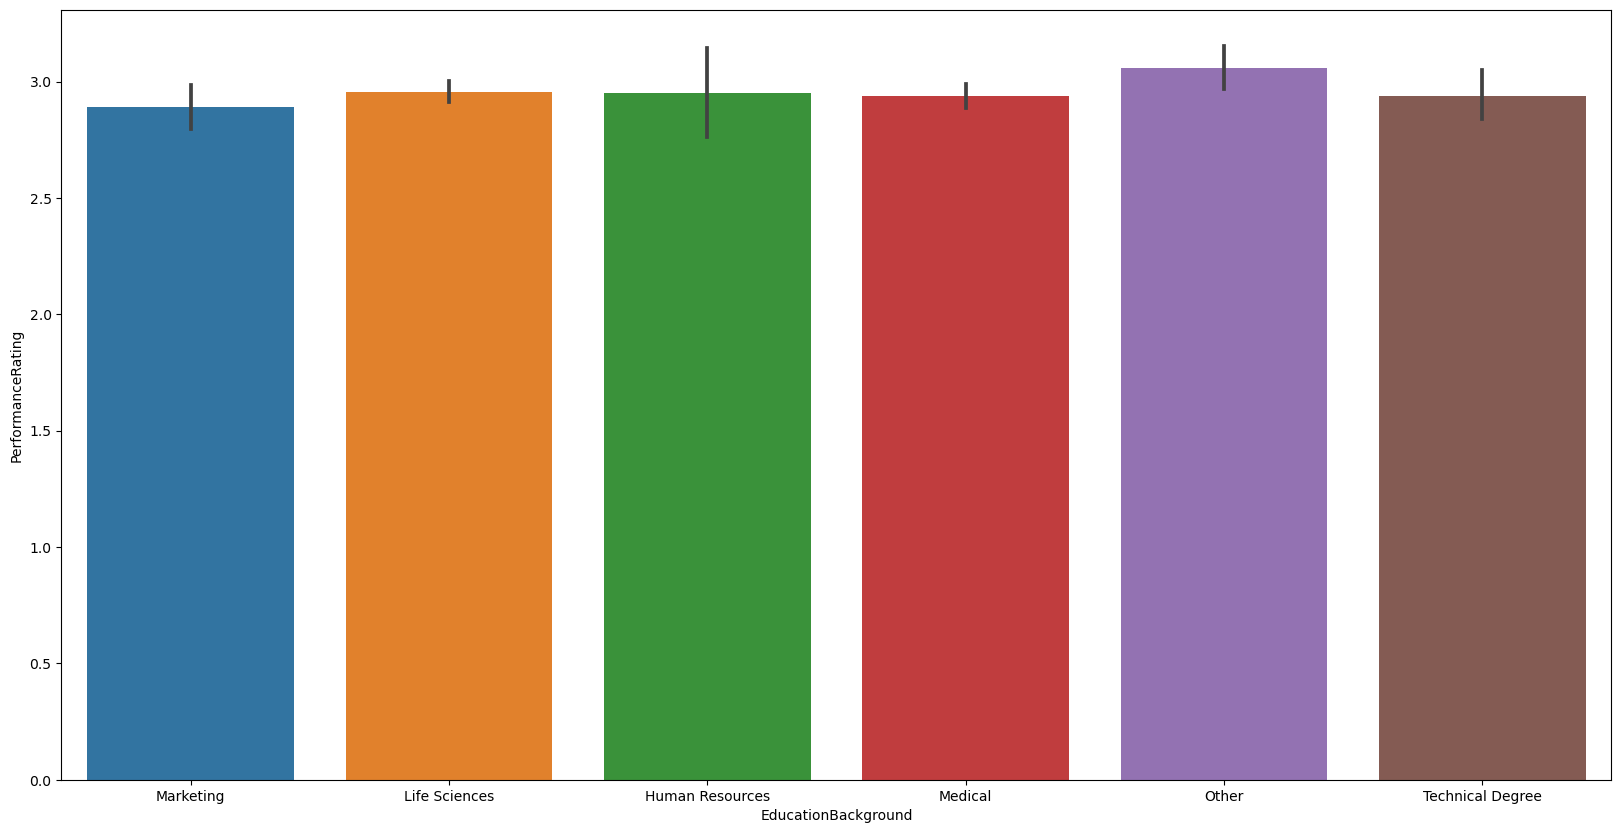

In [16]:
# comparison of EducationBackground with PerformanceRating
plt.figure(figsize=(20,10))
sns.barplot(x=data['EducationBackground'],y=data['PerformanceRating'])

- The top rated employees are  Life Sciences,Human resources and Other Graduates
- The least rated employees are Marketing graduates

<AxesSubplot:xlabel='MaritalStatus', ylabel='PerformanceRating'>

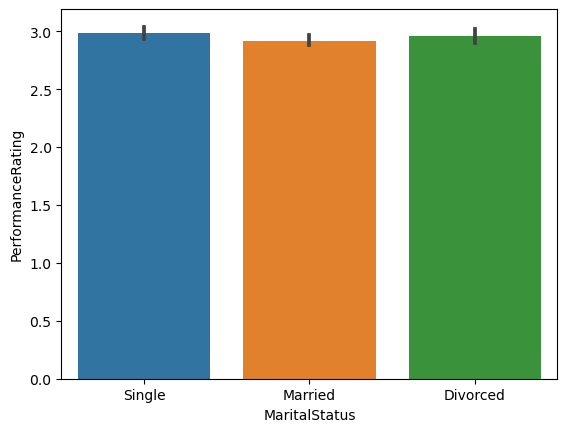

In [17]:
# comparison of MaritalStatus with PerformanceRating
sns.barplot(x=data['MaritalStatus'],y=data['PerformanceRating'])

- The top rated employees are single and divorced employees
- The married employees are rated about 2.8

<AxesSubplot:xlabel='EmpDepartment', ylabel='PerformanceRating'>

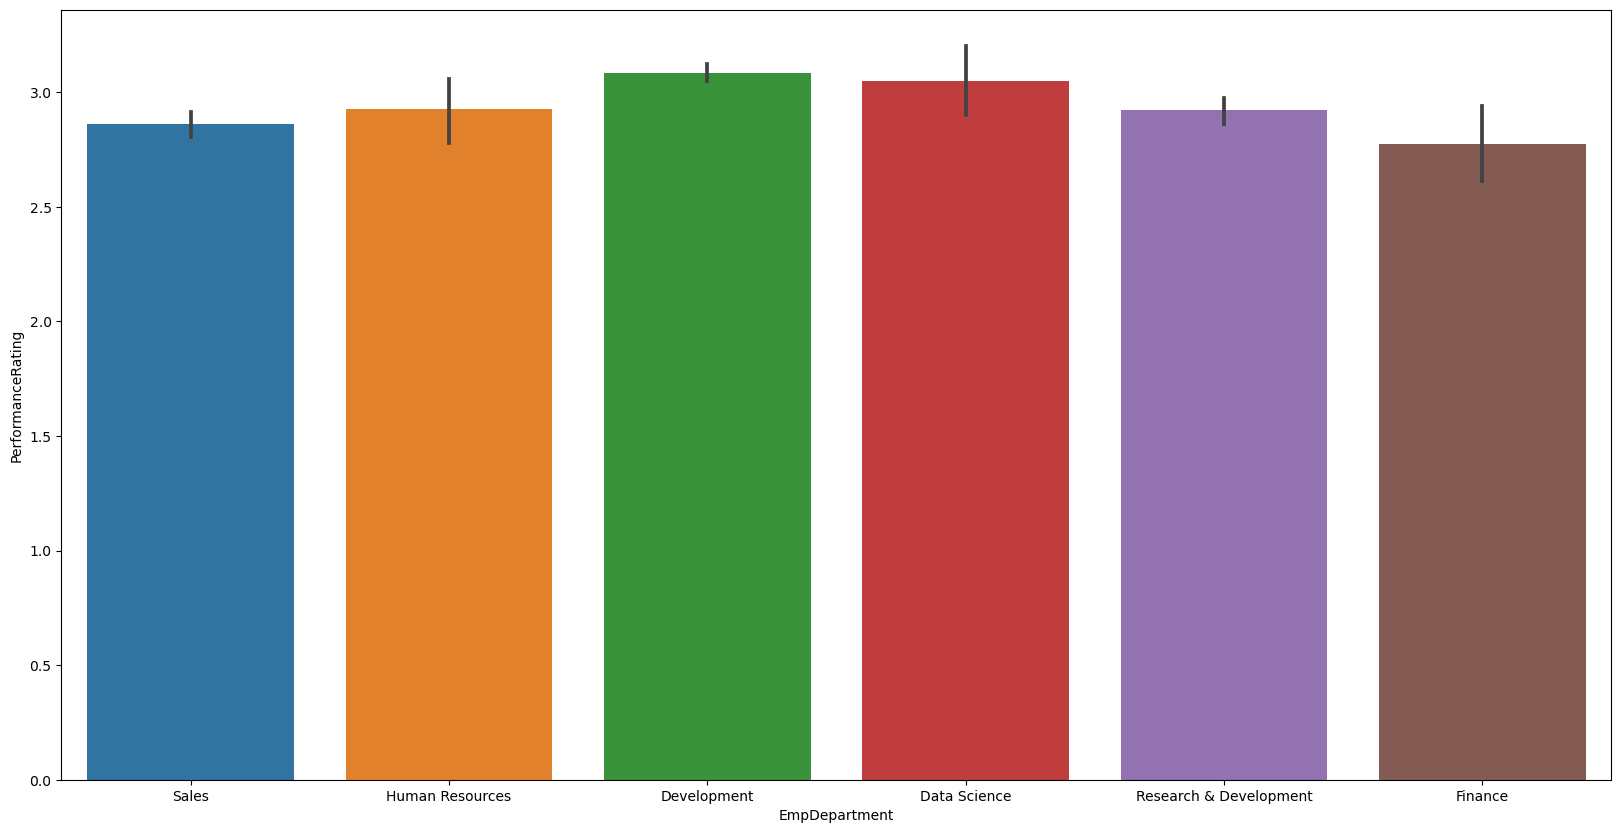

In [18]:
# comparison of EmpDepartment with PerformanceRating
plt.figure(figsize=(20,10))
sns.barplot(x=data['EmpDepartment'],y=data['PerformanceRating'])

- The top rated employees are from Development,data science ,research and development

<AxesSubplot:xlabel='EmpJobRole', ylabel='PerformanceRating'>

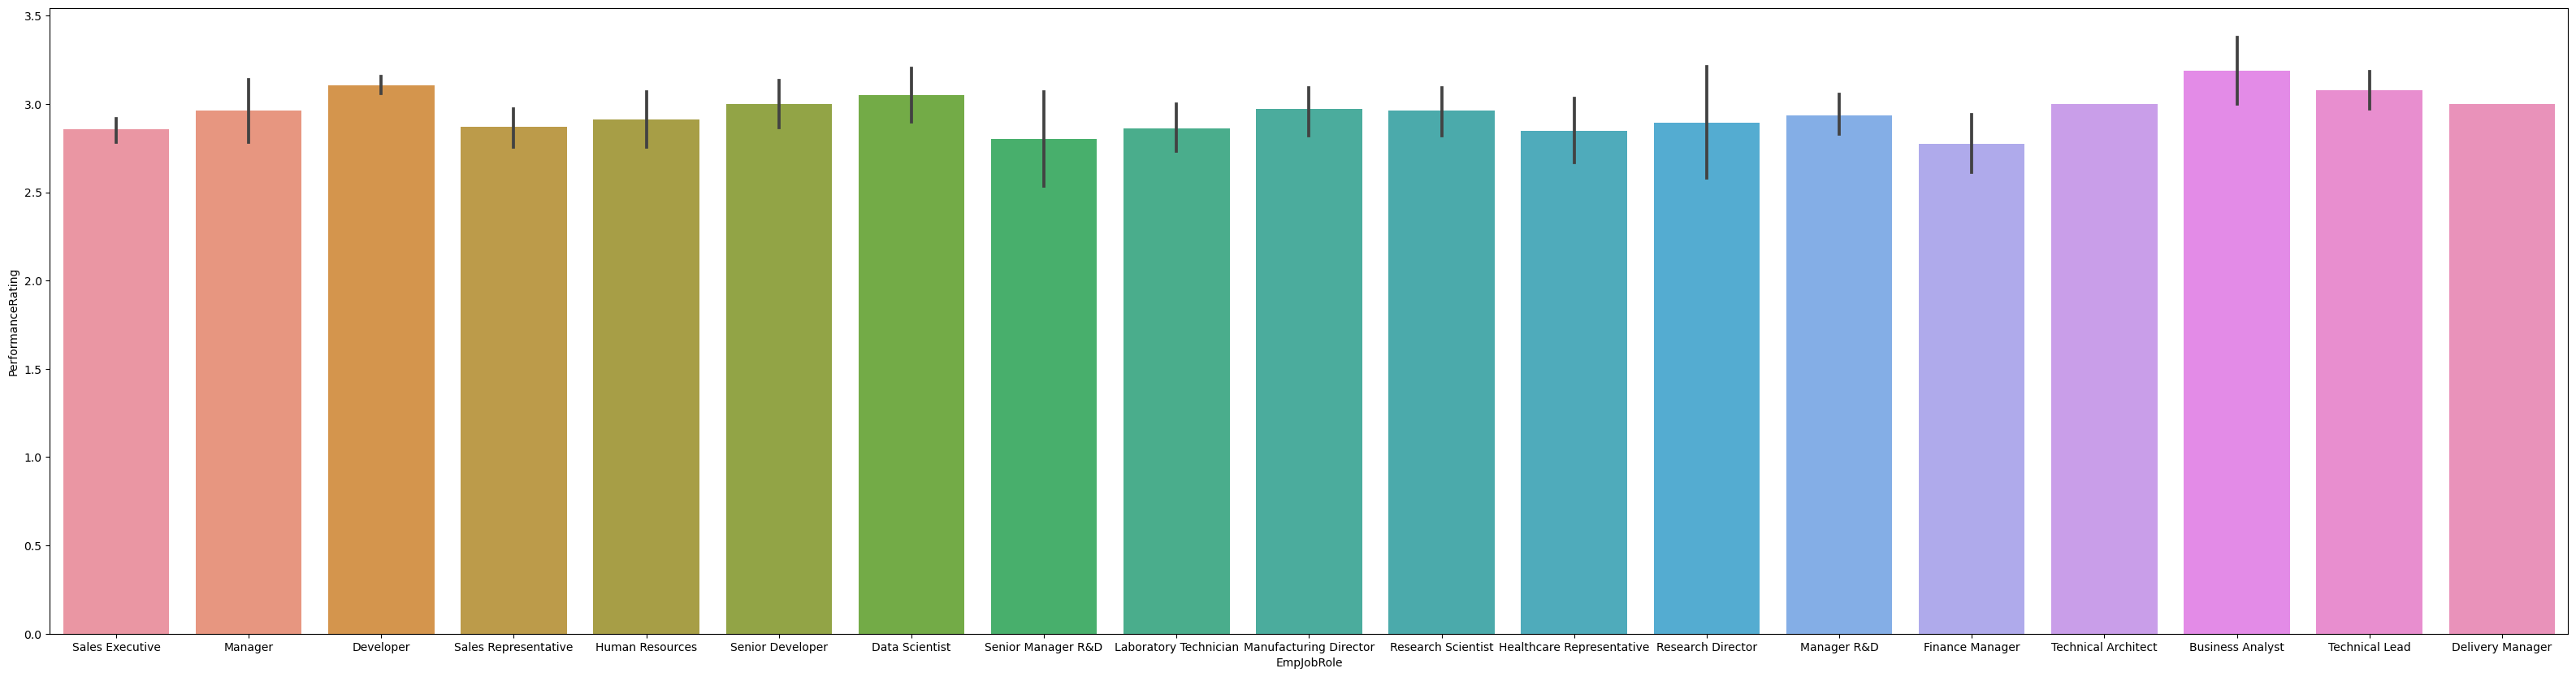

In [19]:
# comparison of EmpJobRole with PerformanceRating
plt.figure(figsize=(40,10))
sns.barplot(x=data['EmpJobRole'],y=data['PerformanceRating'])

- The top rated employees are business analysts ,data scientists and technical leads
- The least rated employees are Sales representatives,Sales manager R&d and labaratory technichian

<AxesSubplot:xlabel='BusinessTravelFrequency', ylabel='PerformanceRating'>

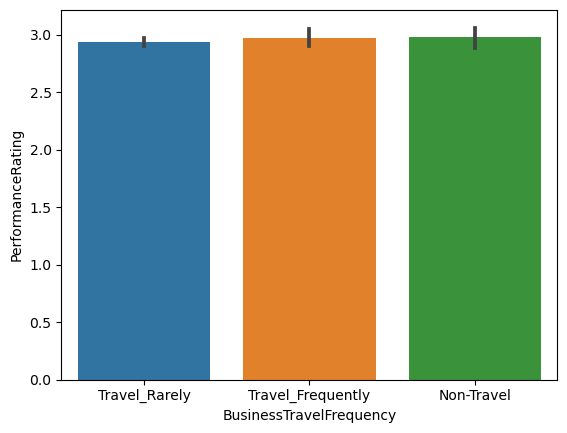

In [20]:
# comparison of BusinessTravelFrequency with PerformanceRating
sns.barplot(x=data['BusinessTravelFrequency'],y=data['PerformanceRating'])

- Employees who tarvel frequently and do not travel at all are the top rated 
- Employees who travel rarely are least rated

<AxesSubplot:xlabel='EmpEducationLevel', ylabel='PerformanceRating'>

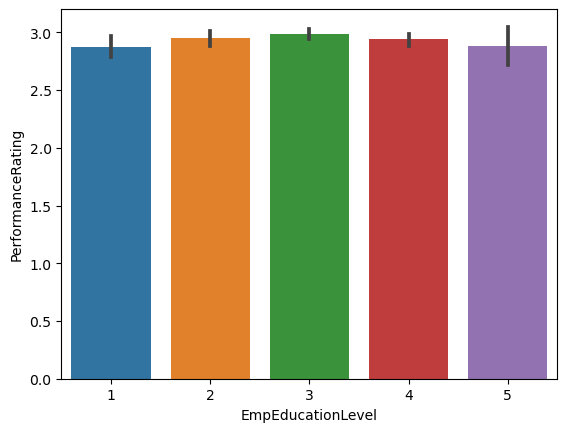

In [21]:
# comparison of EmpEducationLevel with PerformanceRating
sns.barplot(x=data['EmpEducationLevel'],y=data['PerformanceRating'])

- Higher the employee is educated higher is his/her performance rating
- Lower the level of education of the employee least he is rated

<AxesSubplot:xlabel='EmpEnvironmentSatisfaction', ylabel='PerformanceRating'>

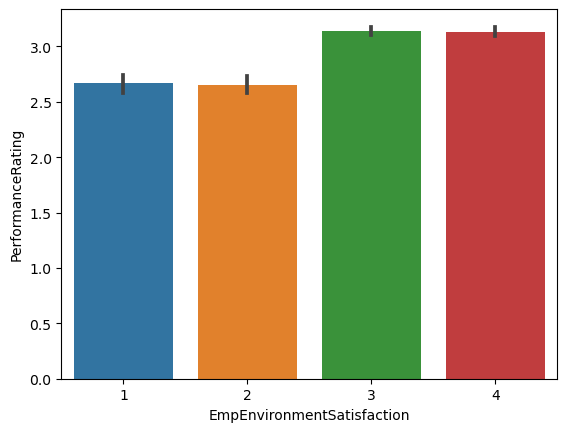

In [22]:
# comparison of EmpEnvironmentSatisfaction with PerformanceRating
sns.barplot(x=data['EmpEnvironmentSatisfaction'],y=data['PerformanceRating'])

- The top rated employees are the employees who are highly satisfied with their environment
- The least rated employees are the ones who are dissatised with their work environment

<AxesSubplot:xlabel='EmpHourlyRate', ylabel='PerformanceRating'>

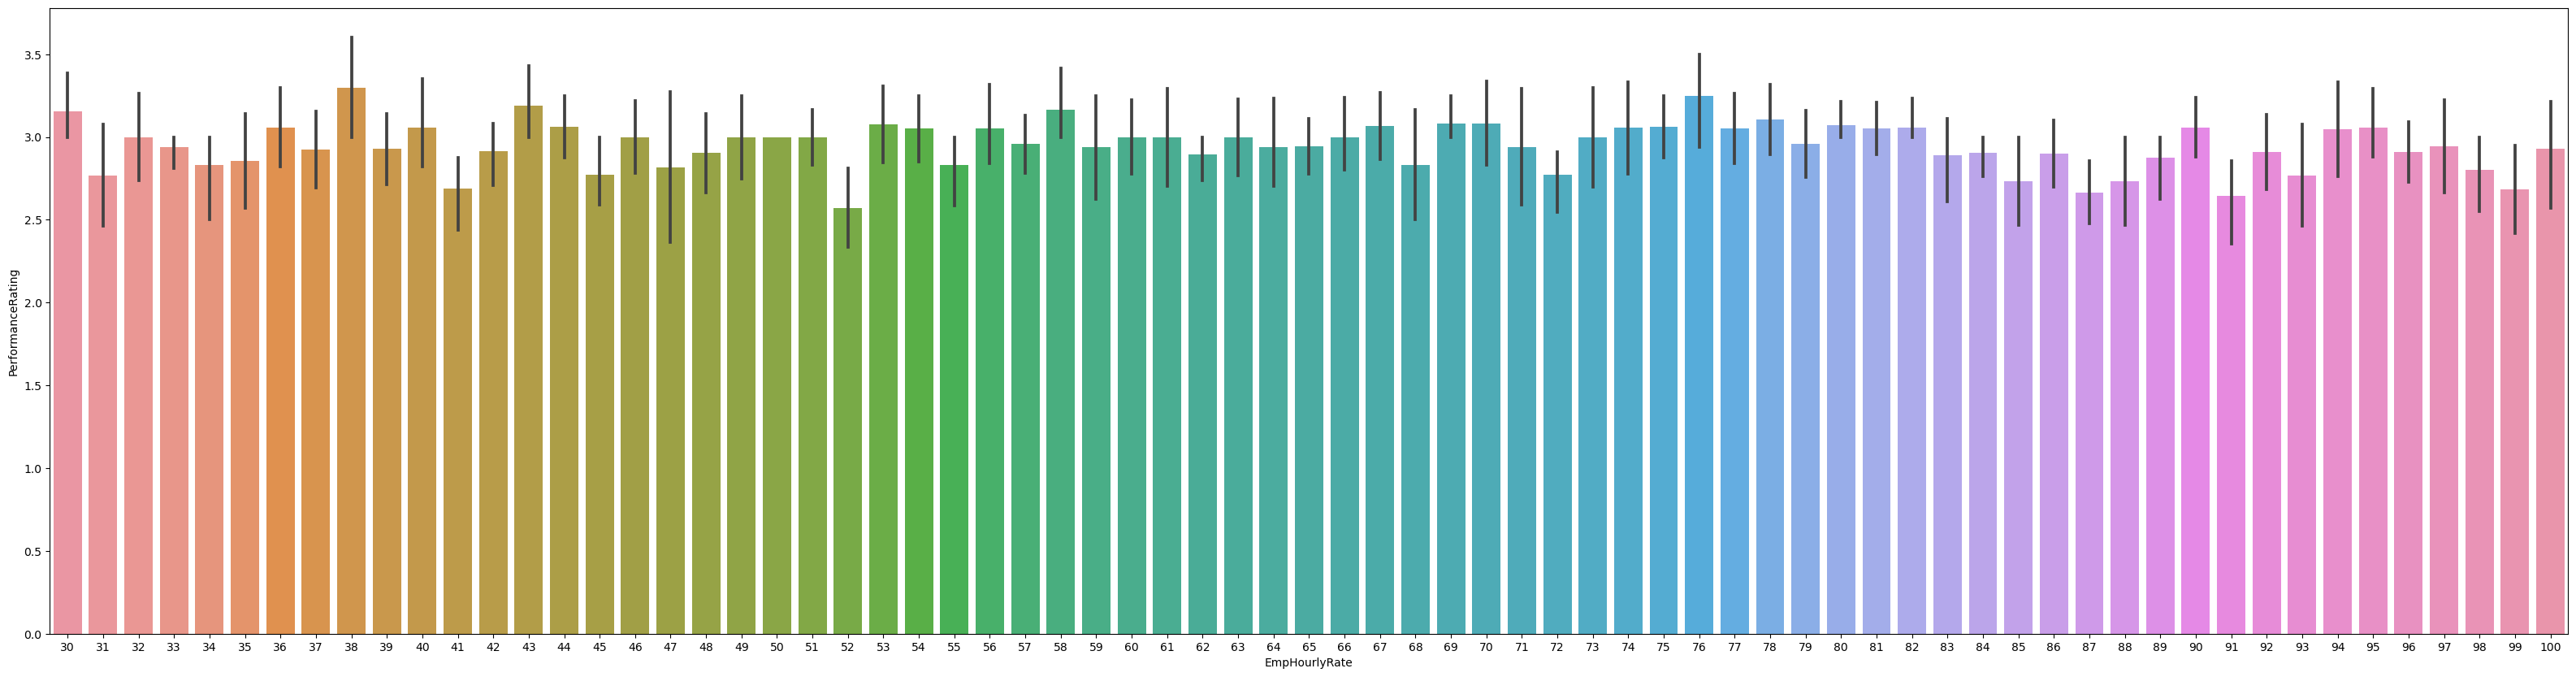

In [23]:
# comparison of EmpHourlyRate with PerformanceRating
plt.figure(figsize=(40,10))
sns.barplot(x=data['EmpHourlyRate'],y=data['PerformanceRating'])

- The employees paid 77rs or dollars per hour and 38 dollars or rs per houe are the top rated 
- The employees paid about 31 rs or dollars per hour are  the least rated employees

<AxesSubplot:xlabel='EmpJobInvolvement', ylabel='PerformanceRating'>

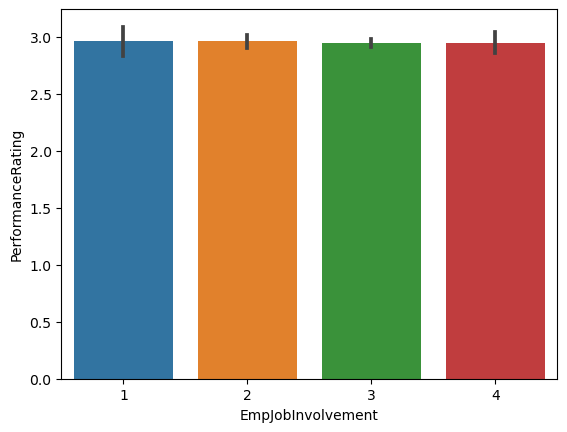

In [24]:
# comparison of EmpJobInvolvement with PerformanceRating
sns.barplot(x=data['EmpJobInvolvement'],y=data['PerformanceRating'])

- The job involvement does not affect the rating of the employee much

<AxesSubplot:xlabel='EmpJobLevel', ylabel='PerformanceRating'>

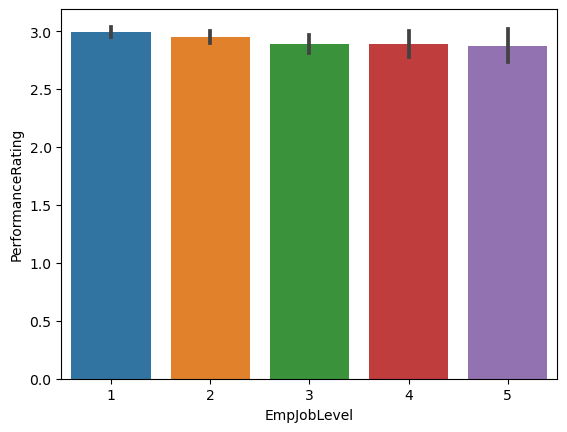

In [25]:
# comparison of EmpJobLevel with PerformanceRating
sns.barplot(x=data['EmpJobLevel'],y=data['PerformanceRating'])

- The job level of the employee does not have much impact on the rating of employee

<AxesSubplot:xlabel='OverTime', ylabel='PerformanceRating'>

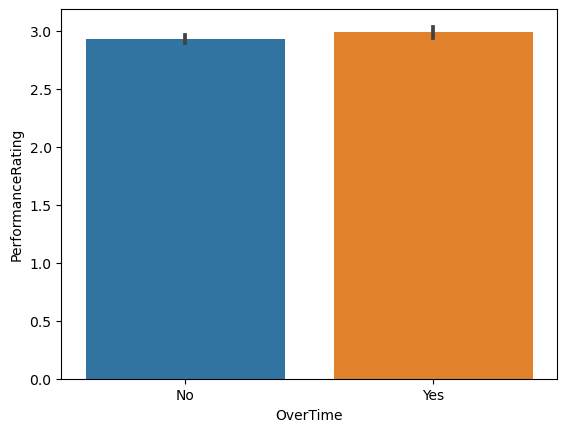

In [26]:
# comparison of OverTime with PerformanceRating
sns.barplot(x=data['OverTime'],y=data['PerformanceRating'])

- The overtime factor does not have much impact on the rating of employees

<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='PerformanceRating'>

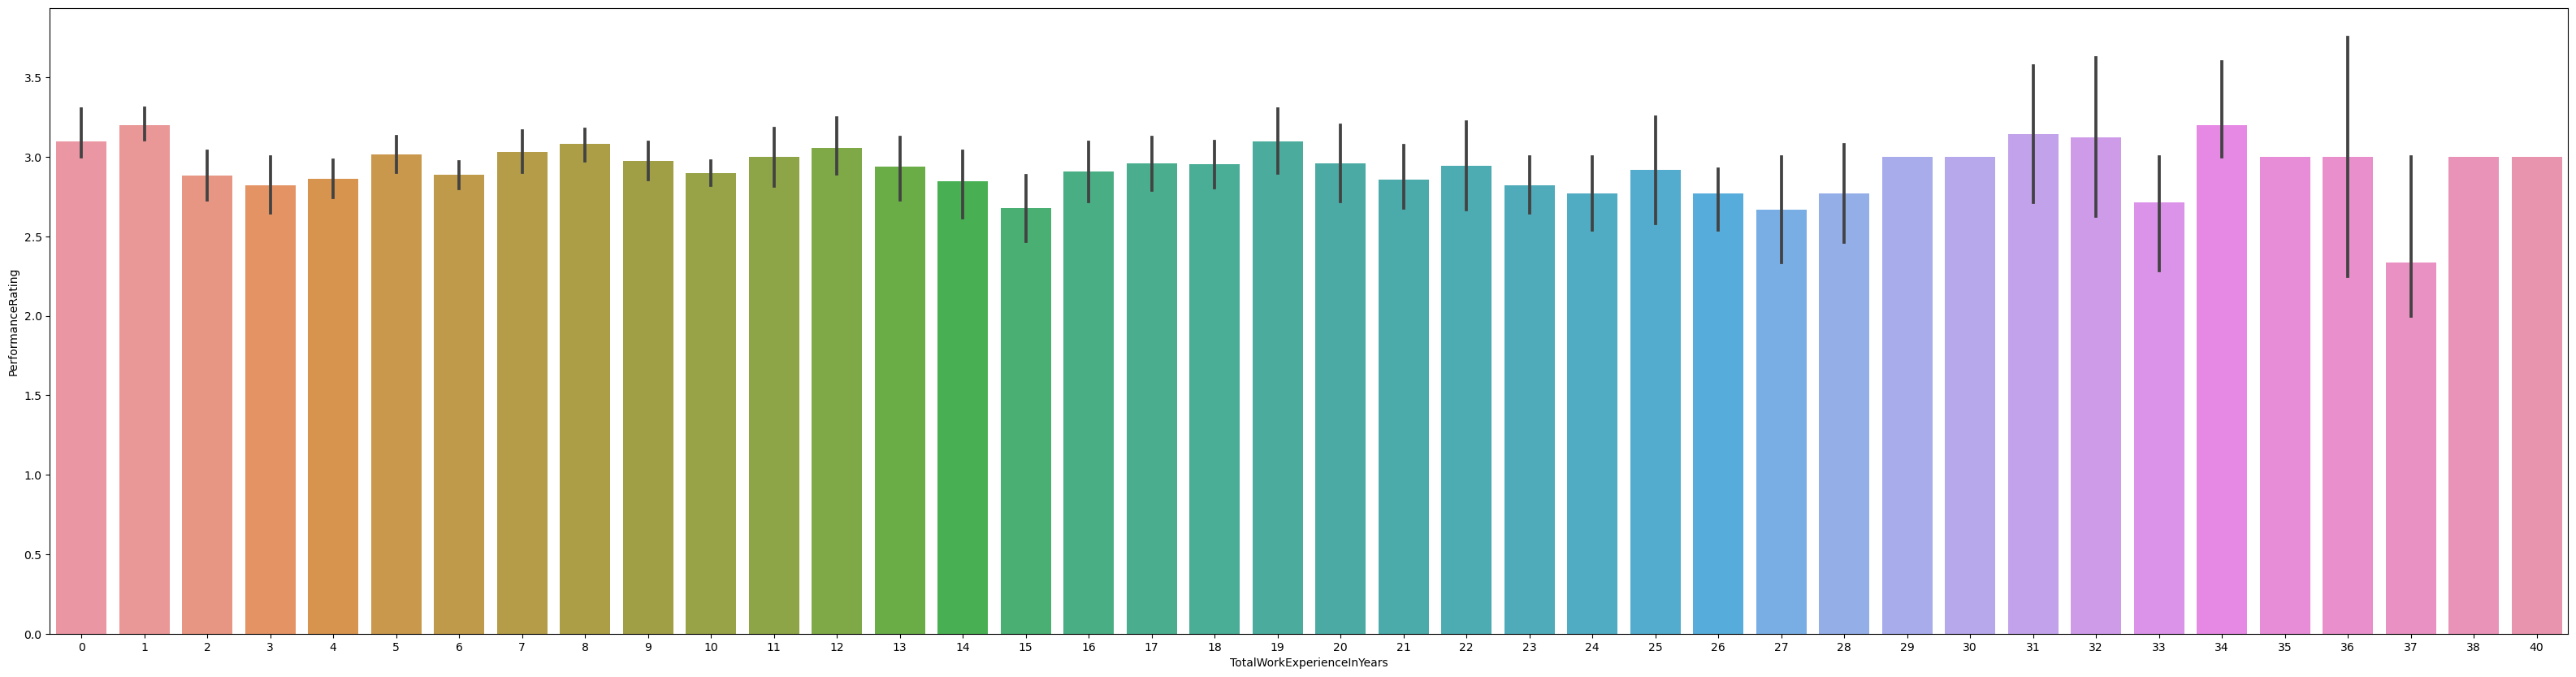

In [27]:
# comparison of TotalWorkExperienceInYears with PerformanceRating
plt.figure(figsize=(40,10))
sns.barplot(x=data['TotalWorkExperienceInYears'],y=data['PerformanceRating'])

- The top rated employees are either freshers or junior level professionals
- The least rated employees have 37 years of work experience

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='PerformanceRating'>

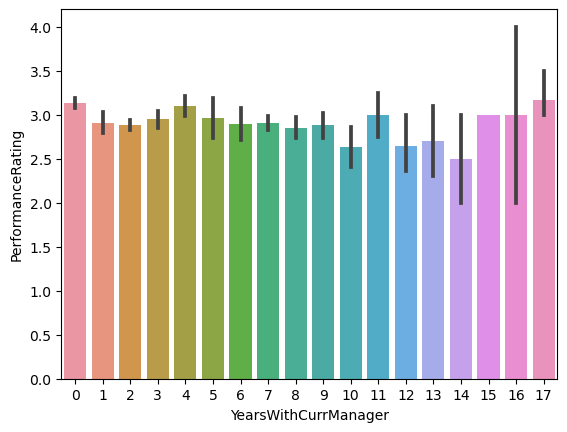

In [28]:
# comparison of YearsWithCurrManager and PerformanceRating
sns.barplot(x=data['YearsWithCurrManager'],y=data['PerformanceRating'])

- the employees working under the same manager for 15 -17 years are top rated
- The employees working under the same manager for 10 and 12 years are the least rated employees

<AxesSubplot:xlabel='Attrition', ylabel='PerformanceRating'>

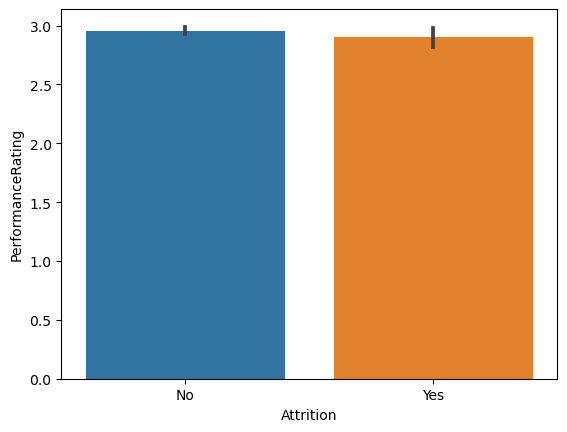

In [29]:
# comparison of Attrition with PerformanceRating
sns.barplot(x=data['Attrition'],y=data['PerformanceRating'])

- Attrtion does not affect employee rating much

#### Multivariate

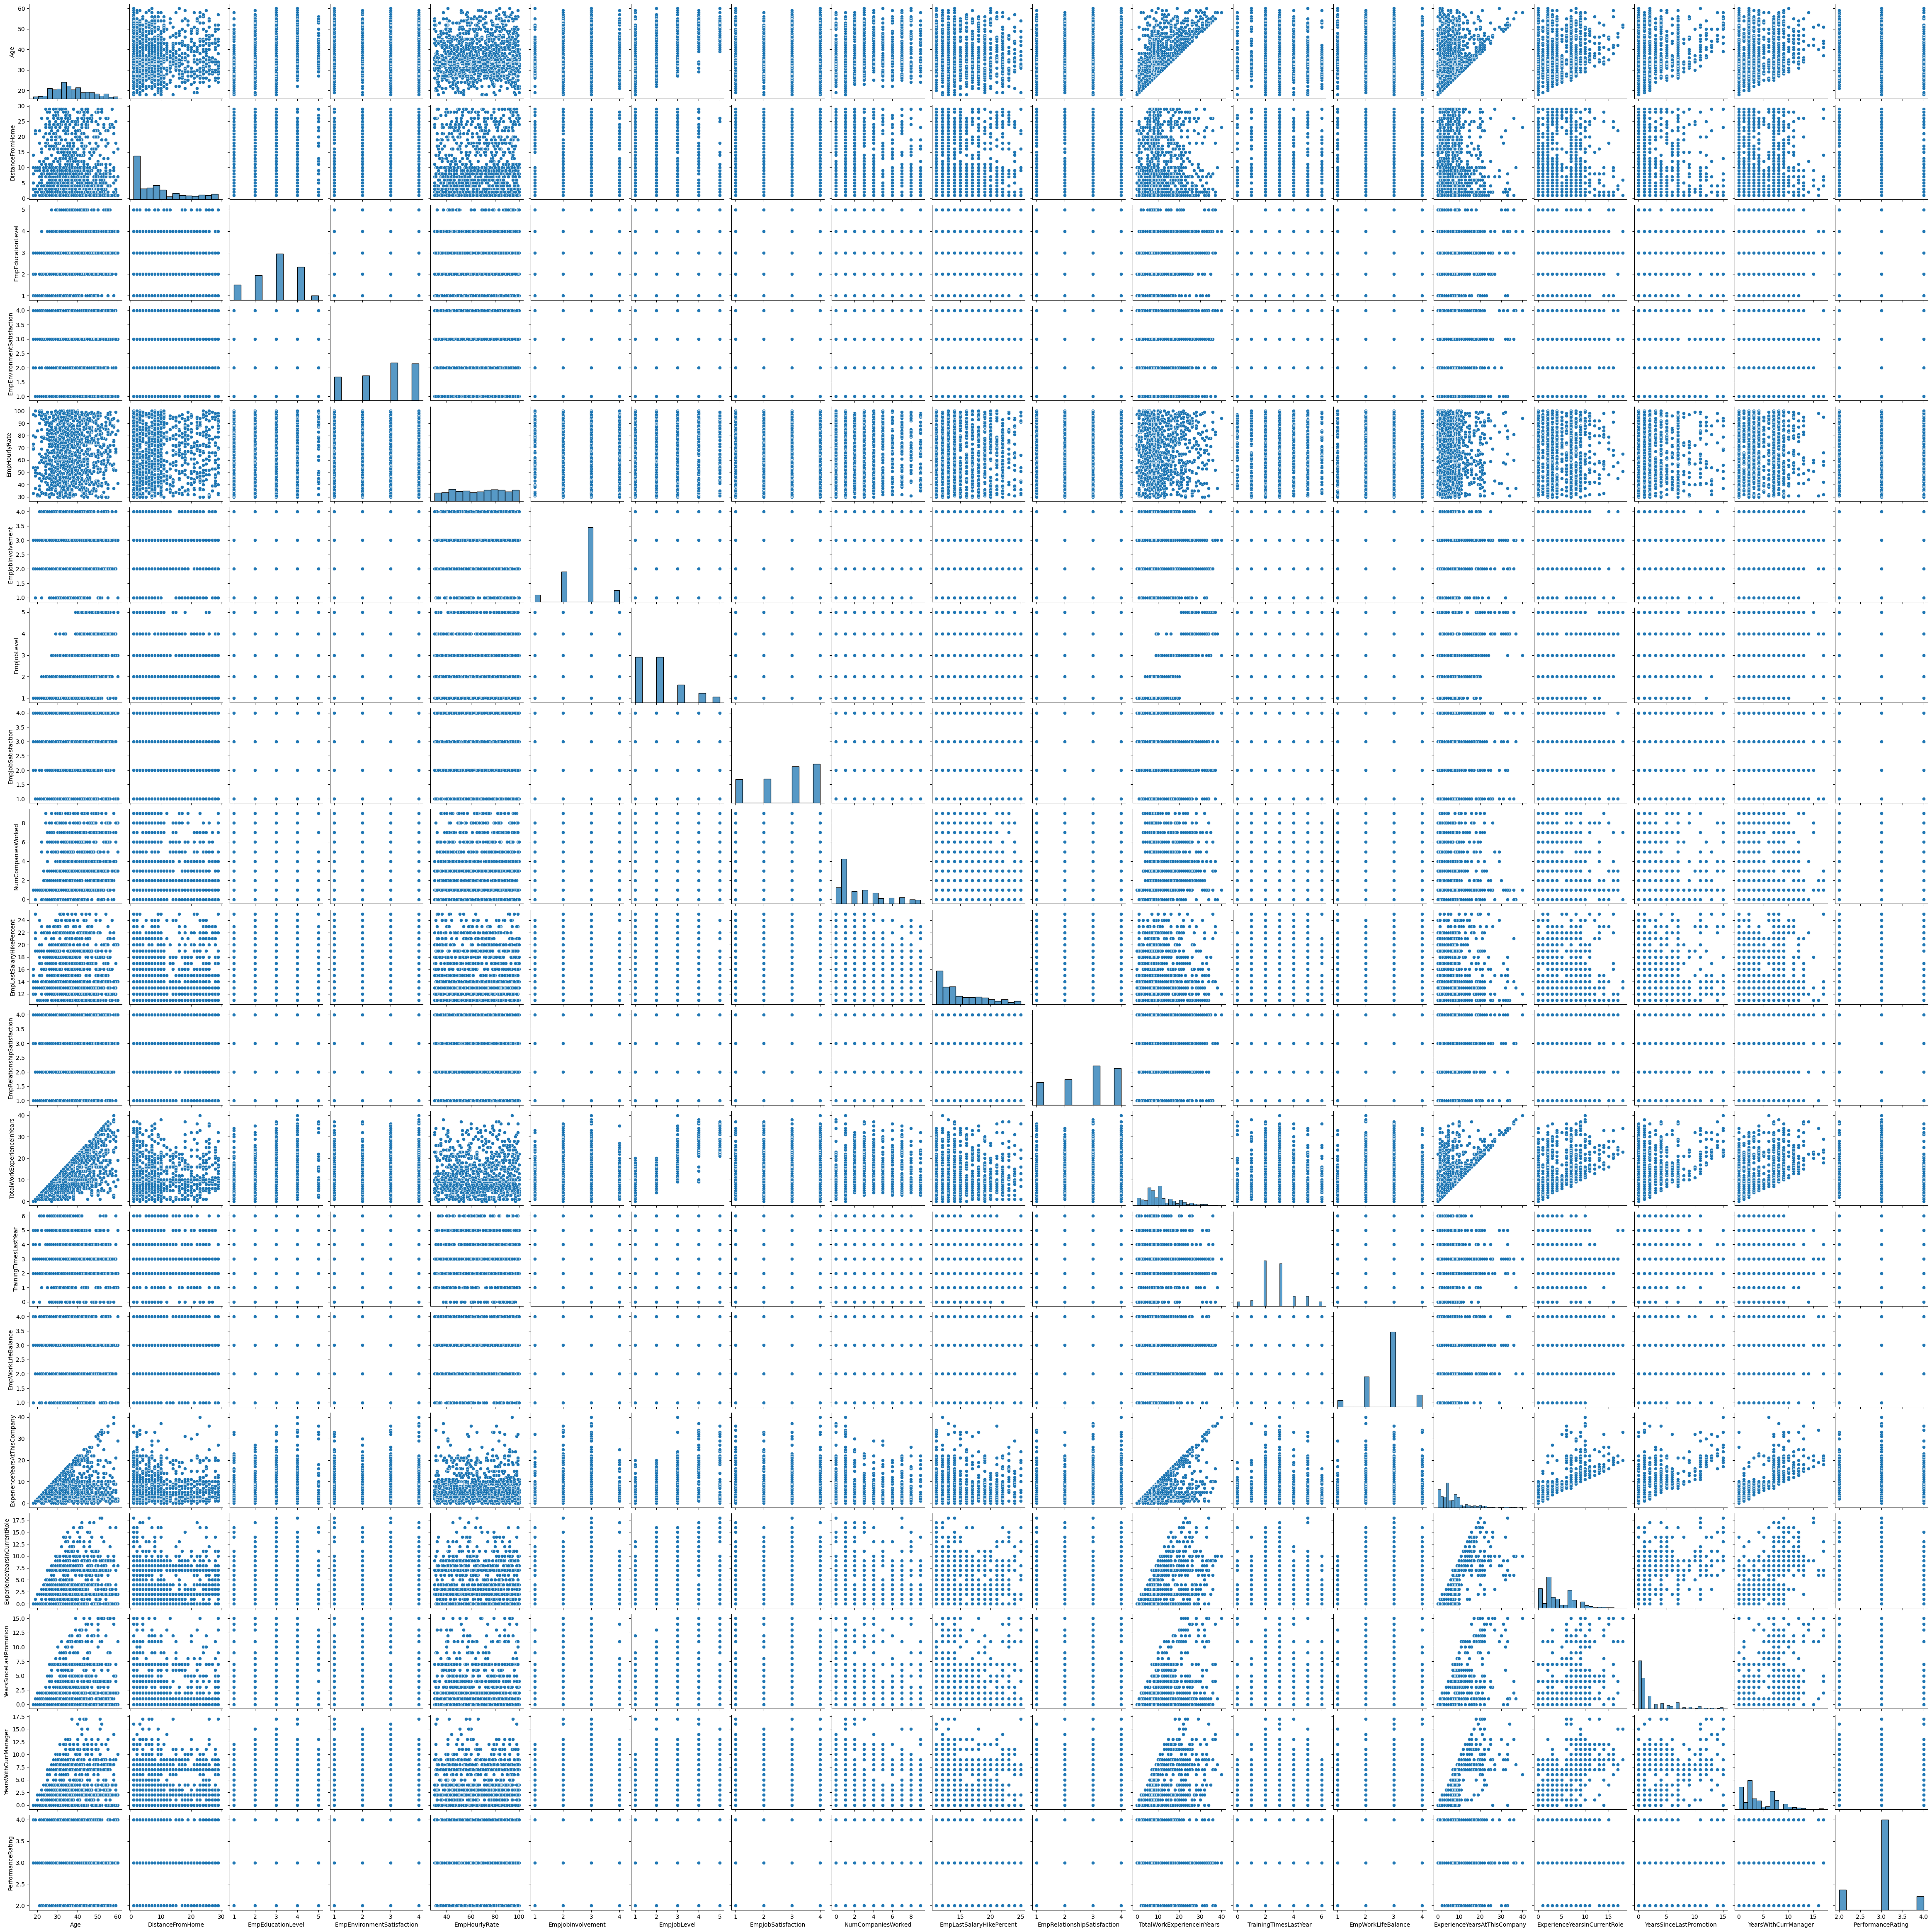

In [30]:
sns.pairplot(data)

## Data preprocessing

In [31]:
# check for null values in data
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

- No null values in the given data

In [32]:
# check for duplicate values in the data
data.duplicated().sum()

0

- No duplicate values in data

In [33]:
data.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

# convertion of categorical columns to numerical
- Gender
- EducationBackground
- MaritalStatus
- EmpDepartment
- EmpJobRole
- BusinessTravelFrequency
- OverTime
- Attrition

In [34]:
data['EmpNumber'].value_counts()

E1001000    1
E100346     1
E100342     1
E100341     1
E100340     1
           ..
E1001718    1
E1001717    1
E1001716    1
E1001713    1
E100998     1
Name: EmpNumber, Length: 1200, dtype: int64

In [35]:
 from sklearn.preprocessing import LabelEncoder

In [36]:
encoder = LabelEncoder()

In [37]:
data['EmpNumber']= encoder.fit_transform(data['EmpNumber'])

In [38]:
data['EmpNumber'].value_counts()

0       1
806     1
804     1
803     1
802     1
       ..
399     1
398     1
397     1
396     1
1199    1
Name: EmpNumber, Length: 1200, dtype: int64

In [39]:
data['Gender'].value_counts()

Male      725
Female    475
Name: Gender, dtype: int64

In [40]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':2})

In [41]:
data['Gender']

0       1
1       1
2       1
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    2
1199    2
Name: Gender, Length: 1200, dtype: int64

- Male: 1
- Female: 2

In [42]:
data['EducationBackground'].value_counts()

Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: EducationBackground, dtype: int64

In [43]:
data['EducationBackground'] = data['EducationBackground'].map({'Life Sciences':1,'Medical':2,'Marketing':3,
                                                               'Technical Degree':4,'Other':5,'Human Resources':6})

- Life Sciences: 1
- Medical: 2
- Marketing: 3
- Technical Degree: 4 
- Other: 5
- Human Resources: 6 

In [44]:
data['EducationBackground']

0       3
1       3
2       1
3       6
4       3
       ..
1195    2
1196    1
1197    2
1198    2
1199    1
Name: EducationBackground, Length: 1200, dtype: int64

In [45]:
data['MaritalStatus'].value_counts()

Married     548
Single      384
Divorced    268
Name: MaritalStatus, dtype: int64

In [46]:
data['MaritalStatus'] = data['MaritalStatus'].map({'Married': 1, 'Single': 2, 'Divorced': 3})

- Married: 1
- Single: 2
- Divorced: 3

In [47]:
data['MaritalStatus']

0       2
1       2
2       1
3       3
4       2
       ..
1195    3
1196    2
1197    1
1198    2
1199    2
Name: MaritalStatus, Length: 1200, dtype: int64

In [48]:
data['EmpDepartment'].value_counts()

Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: EmpDepartment, dtype: int64

In [49]:
data['EmpDepartment']= data['EmpDepartment'].map({'Sales':1,'Development':2,'Research & Development':3,
                                                  'Human Resources':4,'Finance':5,'Data Science':6})

- Sales: 1
- Development: 2
- Research & Development: 3
- Human Resources: 4
- Finance: 5
- Data Science: 6

In [50]:
data['EmpDepartment']

0       1
1       1
2       1
3       4
4       1
       ..
1195    1
1196    2
1197    2
1198    6
1199    1
Name: EmpDepartment, Length: 1200, dtype: int64

In [51]:
data['EmpJobRole'].value_counts()

Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: EmpJobRole, dtype: int64

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
encoder = LabelEncoder()

In [54]:
data['EmpJobRole'] = encoder.fit_transform(data['EmpJobRole'])

In [55]:
data['EmpJobRole'].value_counts()

13    270
3     236
9      94
12     77
14     69
7      64
15     52
8      51
4      49
6      45
18     38
10     33
5      33
1      20
11     19
0      16
16     15
2      12
17      7
Name: EmpJobRole, dtype: int64

- Sales Executive: 13
- Developer: 3 
- Manager R&D: 9
- Research Scientist: 12
- Sales Representative: 14
- Laboratory Technician: 7
- Senior Developer: 15
- Manager: 8
- Finance Manager: 4
- Human Resources: 6
- Technical Lead: 18
- Manufacturing Director: 10
- Healthcare Representative: 5
- Data Scientist: 1
- Research Director: 11
- Business Analyst: 0
- Senior Manager R&D : 16
- Delivery Manager: 2
- Technical Architect: 17

In [56]:
data['BusinessTravelFrequency'].value_counts()

Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: BusinessTravelFrequency, dtype: int64

In [57]:
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({'Travel_Rarely':0,'Travel_Frequently':1,
                                                                       'Non-Travel':2})

- Travel_Rarely: 0
- Travel_Frequently: 1
- Non-Travel: 2

In [58]:
data['OverTime'].value_counts()

No     847
Yes    353
Name: OverTime, dtype: int64

In [59]:
data['OverTime'] = data['OverTime'].map({'Yes':1,'No':0})

- Yes: 1
- No: 0

In [60]:
data['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [61]:
data['Attrition'] = data['Attrition'].map({'Yes':1,'No':0})

In [62]:
data.dtypes

EmpNumber                       int32
Age                             int64
Gender                          int64
EducationBackground             int64
MaritalStatus                   int64
EmpDepartment                   int64
EmpJobRole                      int32
BusinessTravelFrequency         int64
DistanceFromHome                int64
EmpEducationLevel               int64
EmpEnvironmentSatisfaction      int64
EmpHourlyRate                   int64
EmpJobInvolvement               int64
EmpJobLevel                     int64
EmpJobSatisfaction              int64
NumCompaniesWorked              int64
OverTime                        int64
EmpLastSalaryHikePercent        int64
EmpRelationshipSatisfaction     int64
TotalWorkExperienceInYears      int64
TrainingTimesLastYear           int64
EmpWorkLifeBalance              int64
ExperienceYearsAtThisCompany    int64
ExperienceYearsInCurrentRole    int64
YearsSinceLastPromotion         int64
YearsWithCurrManager            int64
Attrition   

### Check for outliers

#### EmpNumber

<AxesSubplot:xlabel='EmpNumber'>

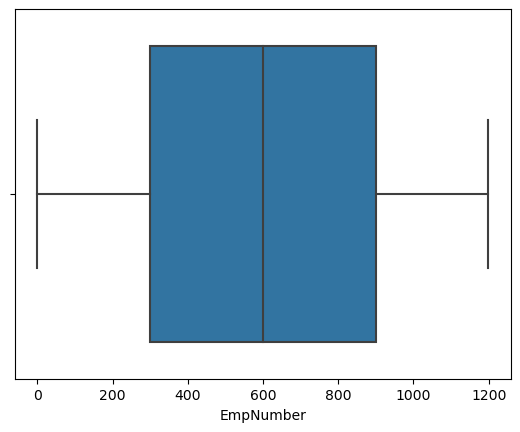

In [63]:
sns.boxplot(x=data['EmpNumber'])

- No outliers in EmpNumber column

#### Age

<AxesSubplot:xlabel='Age'>

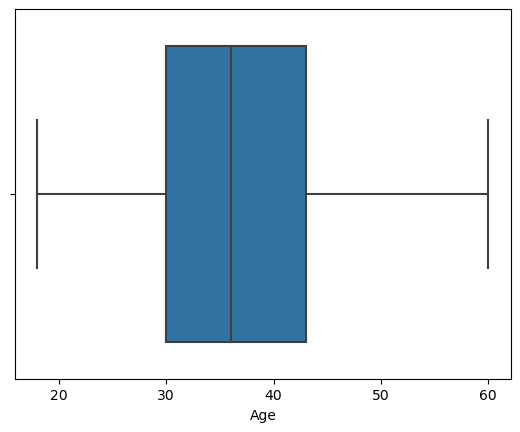

In [64]:
sns.boxplot(x=data['Age'])

- No outliers in age column

#### Gender

<AxesSubplot:xlabel='Gender'>

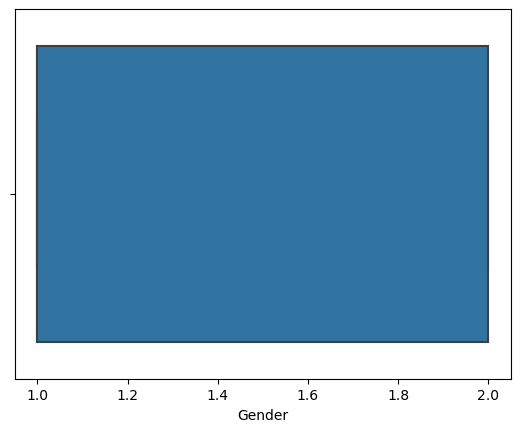

In [65]:
sns.boxplot(x=data['Gender'])

- No outliers in Gender column

#### EducationBackground

<AxesSubplot:xlabel='EducationBackground'>

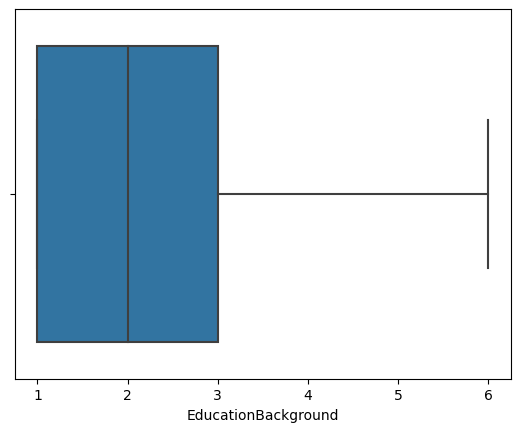

In [66]:
sns.boxplot(x=data['EducationBackground'])

- No outliers in EducationBackground column

#### MaritalStatus

<AxesSubplot:xlabel='MaritalStatus'>

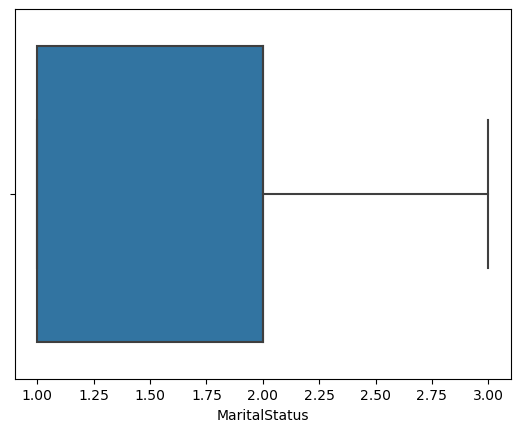

In [67]:
sns.boxplot(x=data['MaritalStatus'])

- No outliers in MaritalStatus column

#### EmpDepartment

<AxesSubplot:xlabel='EmpDepartment'>

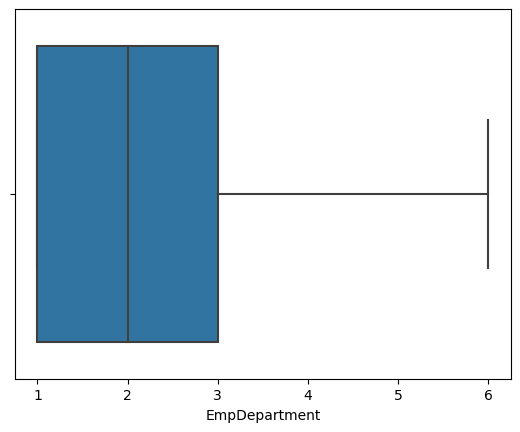

In [68]:
sns.boxplot(x=data['EmpDepartment'])

- No outliers in EmpDepartment column

#### EmpJobRole

<AxesSubplot:xlabel='EmpJobRole'>

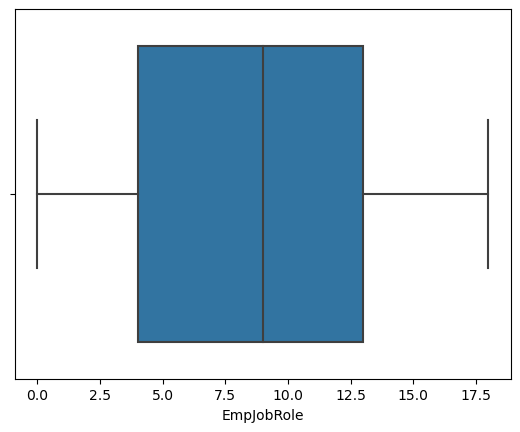

In [69]:
sns.boxplot(x=data['EmpJobRole'])

- No outliers in EmpJobRole column

#### BusinessTravelFrequency

<AxesSubplot:xlabel='BusinessTravelFrequency'>

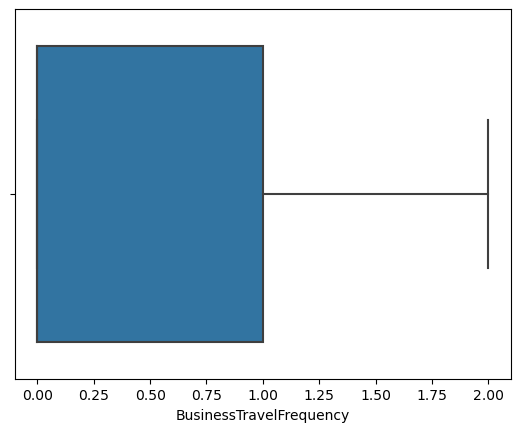

In [70]:
sns.boxplot(x=data['BusinessTravelFrequency'])

- No outliers in BusinessTravelFrequency column

#### DistanceFromHome

<AxesSubplot:xlabel='DistanceFromHome'>

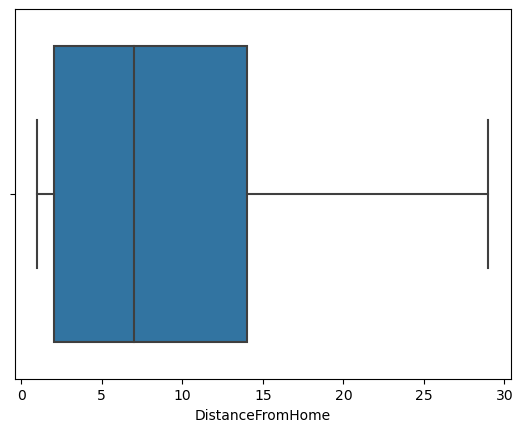

In [71]:
sns.boxplot(x=data['DistanceFromHome'])

- No outliers in DistanceFromHome column

#### EmpEducationLevel

<AxesSubplot:xlabel='EmpEducationLevel'>

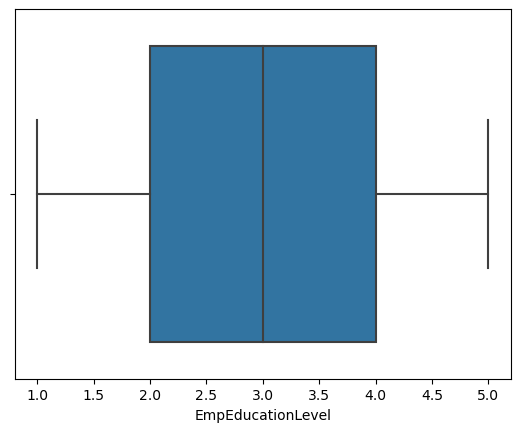

In [72]:
sns.boxplot(x=data['EmpEducationLevel'])

- No outliers in EmpEducationLevel column

#### EmpEnvironmentSatisfaction

<AxesSubplot:xlabel='EmpEnvironmentSatisfaction'>

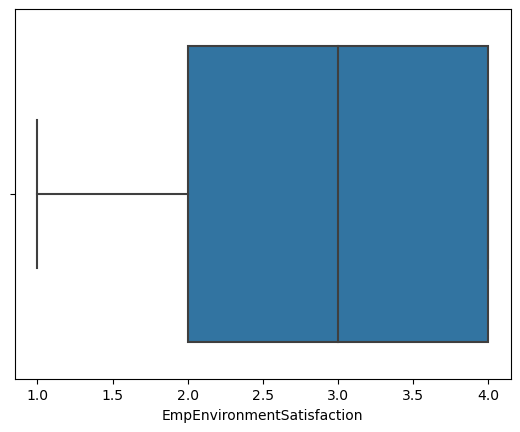

In [73]:
sns.boxplot(x=data['EmpEnvironmentSatisfaction'])

- No outliers in EmpEnvironmentSatisfaction column

#### EmpHourlyRate

<AxesSubplot:xlabel='EmpHourlyRate'>

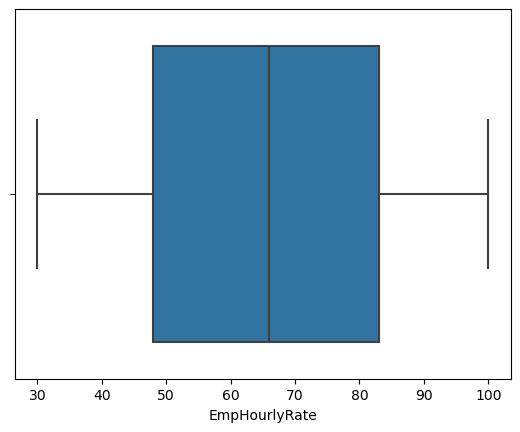

In [74]:
sns.boxplot(x=data['EmpHourlyRate'])

- No outliers  in EmpHourlyRate column

#### EmpJobInvolvement

<AxesSubplot:xlabel='EmpJobInvolvement'>

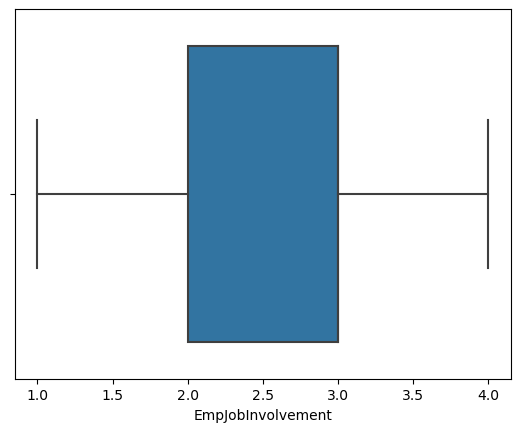

In [75]:
sns.boxplot(x=data['EmpJobInvolvement'])

- No outliers in EmpJobInvolvement column

#### EmpJobLevel

<AxesSubplot:xlabel='EmpJobLevel'>

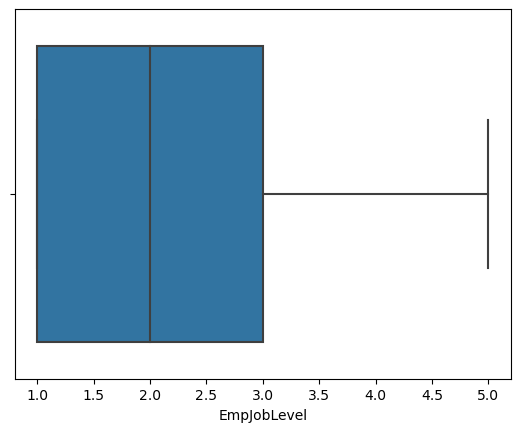

In [76]:
sns.boxplot(x=data['EmpJobLevel'])

- No outliers in EmpJobLevel column

#### EmpJobSatisfaction

<AxesSubplot:xlabel='EmpJobSatisfaction'>

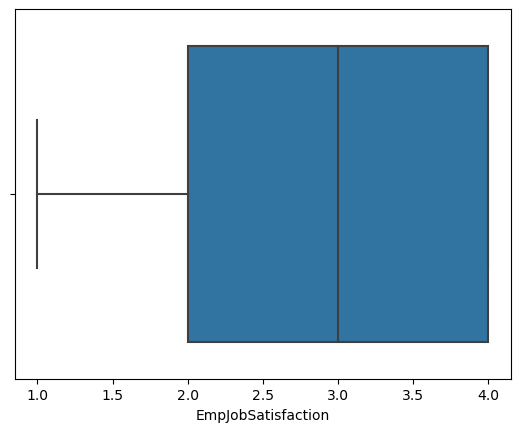

In [77]:
sns.boxplot(x=data['EmpJobSatisfaction'])

- No outliers in EmpJobSatisfaction column

#### NumCompaniesWorked

<AxesSubplot:xlabel='NumCompaniesWorked'>

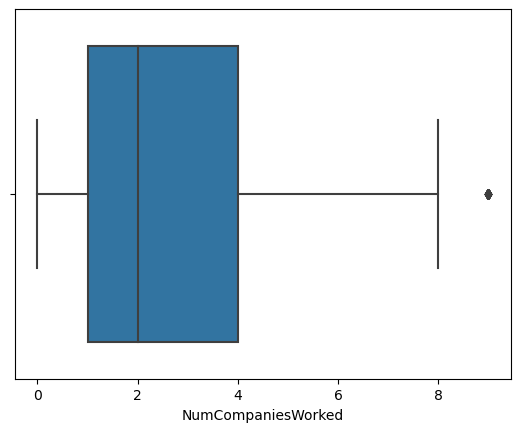

In [78]:
sns.boxplot(x=data['NumCompaniesWorked'])

<AxesSubplot:ylabel='Density'>

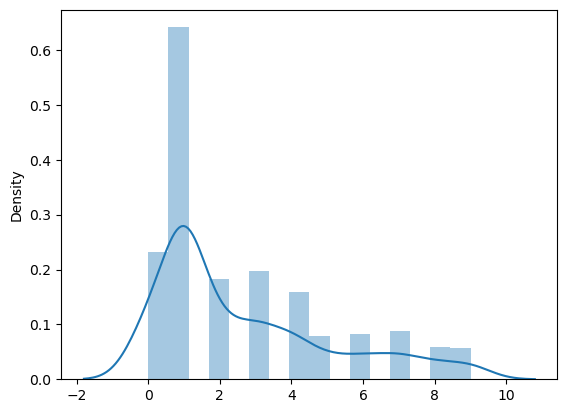

In [79]:
## check for didtribution as there is one outlier in NumCompaniesWorked column
sns.distplot(x=data['NumCompaniesWorked'],kde=True)

In [80]:
## since data is not normal we impute the outliers with IQR
Q1 = data['NumCompaniesWorked'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['NumCompaniesWorked'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 1.0
Q3 : 4.0
IQR : 3.0
lower_limit : -3.5
upper_limit : 8.5


In [81]:
data.loc[data['NumCompaniesWorked']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [82]:
data.loc[data['NumCompaniesWorked']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
8             8   36       2                    1              1   
11           11   47       2                    2              3   
16           16   39       2                    6              1   
38           38   54       2                    2              3   
56           56   42       2                    1              1   
73           73   44       1                    2              2   
105         105   58       1                    1              3   
149         149   50       1                    2              3   
184         184   32       2                    2              2   
211         211   44       1                    2              1   
231         231   39       1                    1              2   
251         251   40       2                    2              2   
321         321   36       2                    1              2   
338         338   52       1                    1              2   
343         343   40       1                    1              3   
409         409   31       2                    2              2   
476         476   34       1                    1              1   
497         497   36       2                    1              1   
553         553   29       2                    2              1   
588         588   43       1                    4              1   
664         664   42       1                    2              1   
740         740   29       1                    2              1   
766         766   27       1                    2              1   
793         793   36       2                    1              1   
804         804   48       1                    1              2   
925         925   45       1                    2              1   
929         929   38       1                    1              1   
939         939   40       1                    1              1   
967         967   31       1                    2              3   
1003       1003   38       1                    1              3   
1006       1006   49       2                    1              2   
1042       1042   45       1                    5              1   
1069       1069   29       1                    1              2   
1070       1070   35       1                    1              2   
1082       1082   30       1                    4              2   
1130       1130   34       2                    6              3   
1137       1137   35       1                    3              1   
1143       1143   31       1                    1              3   
1199       1199   24       2                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
8                 2           3                        2                 8   
11                1          13                        1                 3   
16                4           6                        0                 3   
38                2           3                        0                19   
56                2           3                        0                 1   
73                2           3                        0                 4   
105               2           3                        1                 2   
149               2          15                        0                 1   
184               3          16                        2                29   
211               4           6                        0                 1   
231               3           7                        2                 9   
251               3          11                        1                 9   
321               3          10                        0                 2   
338               1          13                        0                 5   
343               3          12                        2                16   
409               4           6      

In [83]:
data.loc[data['NumCompaniesWorked']>upper_limit].shape

(39, 28)

In [84]:
data.shape

(1200, 28)

In [85]:
39/1200*100

3.25

In [86]:
# only 3% of ouliers hence we impute the values with median
data.loc[data['NumCompaniesWorked']>upper_limit,'NumCompaniesWorked']= data['NumCompaniesWorked'].median()

In [87]:
data.loc[data['NumCompaniesWorked']>upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### OverTime

<AxesSubplot:xlabel='OverTime'>

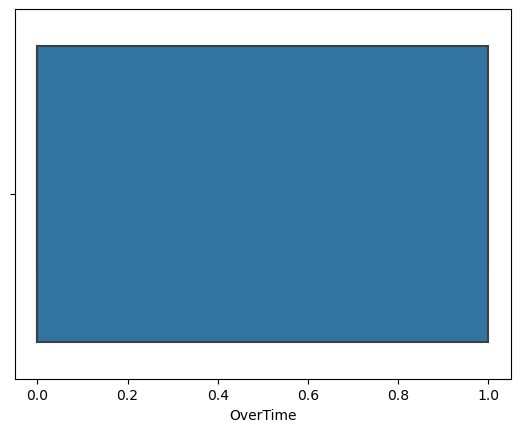

In [88]:
sns.boxplot(x=data['OverTime'])

- No outliers in OverTime column

## EmpLastSalaryHikePercent

<AxesSubplot:xlabel='EmpLastSalaryHikePercent'>

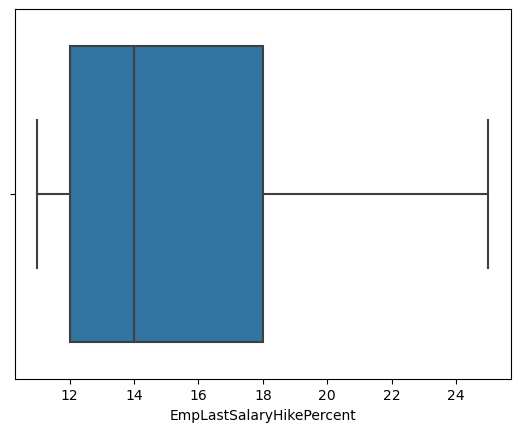

In [89]:
sns.boxplot(x=data['EmpLastSalaryHikePercent'])

- No outliers in EmpLastSalaryHikePercent column

#### EmpRelationshipSatisfaction

<AxesSubplot:xlabel='EmpRelationshipSatisfaction'>

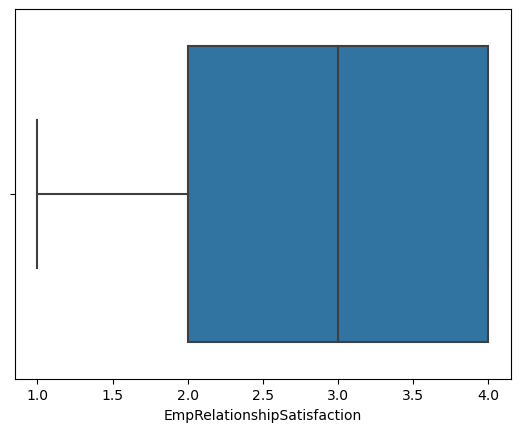

In [90]:
sns.boxplot(x=data['EmpRelationshipSatisfaction'])

- No outliers in EmpRelationshipSatisfaction column

#### TotalWorkExperienceInYears

<AxesSubplot:xlabel='TotalWorkExperienceInYears'>

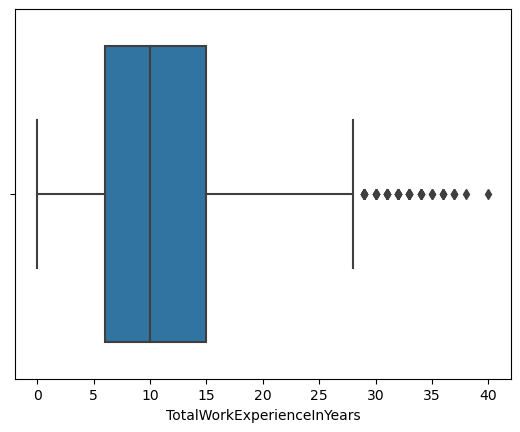

In [91]:
sns.boxplot(x=data['TotalWorkExperienceInYears'])

<AxesSubplot:ylabel='Density'>

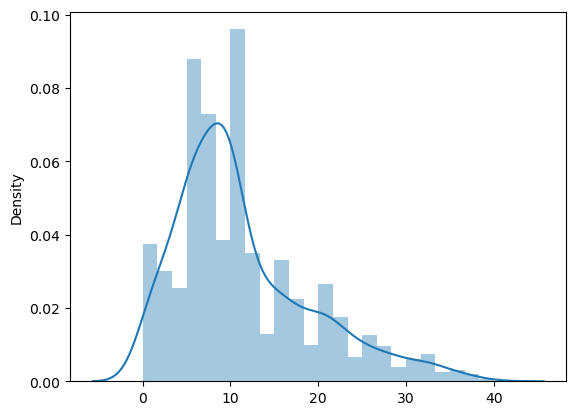

In [92]:
sns.distplot(x=data['TotalWorkExperienceInYears'],kde=True)

In [93]:
# since data is not normal we impute the outliers with IQR
Q1 = data['TotalWorkExperienceInYears'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['TotalWorkExperienceInYears'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 6.0
Q3 : 15.0
IQR : 9.0
lower_limit : -7.5
upper_limit : 28.5


In [94]:
data.loc[data['TotalWorkExperienceInYears']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [95]:
data.loc[data['TotalWorkExperienceInYears']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
17           17   56       1                    2              1   
25           25   52       1                    3              1   
48           48   50       1                    2              1   
72           72   51       2                    3              1   
77           77   53       2                    3              1   
96           96   53       2                    1              2   
100         100   50       1                    1              3   
149         149   50       1                    2              3   
173         173   59       2                    1              2   
178         178   52       2                    3              1   
192         192   50       1                    2              1   
199         199   55       1                    2              2   
277         277   50       2                    2              1   
292         292   54       2                    1              3   
295         295   54       1                    1              1   
308         308   55       1                    2              3   
312         312   51       1                    1              3   
342         342   56       1                    1              2   
347         347   51       1                    1              3   
351         351   58       2                    2              1   
356         356   51       2                    4              2   
361         361   56       1                    1              1   
387         387   54       2                    2              2   
388         388   58       2                    2              1   
424         424   49       1                    1              3   
450         450   50       1                    2              2   
471         471   53       2                    4              1   
475         475   55       1                    3              1   
490         490   50       1                    2              1   
525         525   49       2                    1              1   
528         528   54       2                    2              1   
589         589   55       1                    2              1   
615         615   58       1                    2              3   
642         642   48       1                    1              1   
678         678   58       2                    1              1   
703         703   55       1                    6              1   
777         777   53       2                    1              1   
816         816   50       2                    2              3   
845         845   58       1                    2              2   
867         867   58       2                    2              1   
921         921   52       1                    1              1   
958         958   50       2                    2              3   
962         962   52       1                    1              2   
989         989   55       1                    2              2   
1077       1077   55       2                    1              2   
1101       1101   52       2                    1              1   
1104       1104   60       2                    1              1   
1116       1116   57       1                    3              3   
1135       1135   55       2                    1              2   
1156       1156   49       1                    1              3   
1160       1160   50       1                    2              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
17                2           3                        0                 9   
25                1           8                        0                 3   
48                2           3                        0                 2   
72                1           8                        0                26   
77                1          13                        0                 7   
9

In [96]:
data.loc[data['TotalWorkExperienceInYears']>upper_limit].shape

(51, 28)

In [97]:
data.shape

(1200, 28)

In [98]:
51/1200*100

4.25

In [99]:
data.loc[data['TotalWorkExperienceInYears']>upper_limit,'TotalWorkExperienceInYears']= data['TotalWorkExperienceInYears'].median()

In [100]:
data.loc[data['TotalWorkExperienceInYears']>upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### TrainingTimesLastYear

<AxesSubplot:xlabel='TrainingTimesLastYear'>

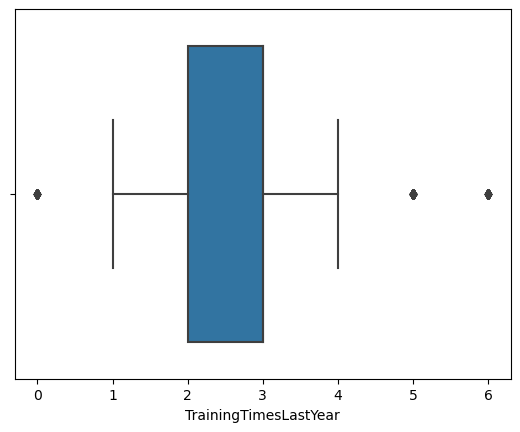

In [101]:
sns.boxplot(x=data['TrainingTimesLastYear'])

<AxesSubplot:ylabel='Density'>

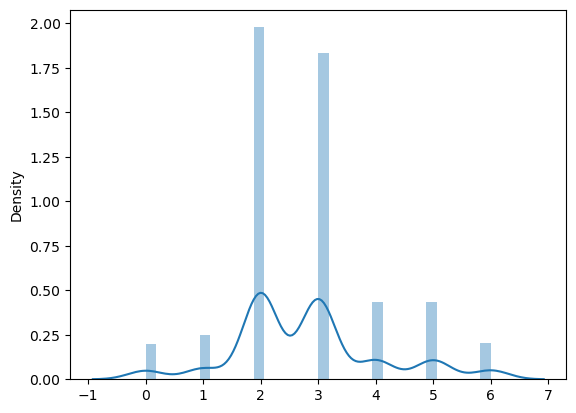

In [102]:
sns.distplot(x=data['TrainingTimesLastYear'],kde=True)

In [103]:
# since data is not normal we impute the outliers with IQR
Q1 = data['TrainingTimesLastYear'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['TrainingTimesLastYear'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 2.0
Q3 : 3.0
IQR : 1.0
lower_limit : 0.5
upper_limit : 4.5


In [104]:
data.loc[data['TrainingTimesLastYear']<lower_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
55           55   35       2                    1              2   
96           96   53       2                    1              2   
104         104   44       1                    1              1   
144         144   31       1                    2              2   
153         153   47       2                    1              2   
156         156   38       1                    2              1   
165         165   48       1                    1              2   
215         215   26       1                    2              3   
232         232   36       1                    1              2   
242         242   18       1                    2              2   
247         247   27       1                    1              1   
333         333   36       2                    4              1   
343         343   40       1                    1              3   
344         344   34       1                    1              3   
351         351   58       2                    2              1   
358         358   35       2                    2              1   
361         361   56       1                    1              1   
363         363   40       2                    2              3   
368         368   28       1                    1              1   
411         411   34       2                    4              1   
414         414   49       1                    4              1   
482         482   29       1                    1              3   
487         487   43       1                    4              3   
516         516   27       2                    2              1   
517         517   27       1                    2              2   
575         575   30       2                    6              3   
615         615   58       1                    2              3   
667         667   31       2                    2              3   
680         680   38       1                    1              3   
703         703   55       1                    6              1   
762         762   27       1                    1              1   
765         765   41       2                    1              2   
798         798   27       1                    1              2   
822         822   36       1                    2              1   
842         842   32       1                    2              2   
876         876   36       1                    2              3   
932         932   49       1                    1              3   
979         979   51       1                    1              1   
981         981   38       1                    1              1   
1002       1002   44       1                    1              3   
1008       1008   26       1                    3              2   
1034       1034   32       2                    2              2   
1040       1040   27       1                    3              1   
1068       1068   21       2                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
55                2          15                        0                 1   
96                2           3                        0                23   
104               2           3                        0                 9   
144               2           3                        2                 9   
153               1          13                        0                 4   
156               3          16                        1                10   
165               3           5                        0                 6   
215               3           9                        0                21   
232               3          10                        2                18   
242               3           7                        2                 8   
247               3          12                        0                 6   
333      

In [105]:
44/1200 *100

3.6666666666666665

In [106]:
data.loc[data['TrainingTimesLastYear']<lower_limit,'TrainingTimesLastYear']= data['TrainingTimesLastYear'].median()

In [107]:
data.loc[data['TrainingTimesLastYear']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
10           10   44       1                    2              2   
13           13   29       1                    1              2   
27           27   25       2                    2              2   
31           31   34       1                    5              2   
59           59   40       1                    2              2   
...         ...  ...     ...                  ...            ...   
1158       1158   26       1                    3              1   
1166       1166   27       2                    2              3   
1184       1184   29       2                    2              1   
1188       1188   20       1                    2              2   
1193       1193   29       1                    1              3   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
10                2           3                        2                24   
13                1          14                        0                10   
27                1          13                        0                26   
31                1          13                        0                 2   
59                2           3                        1                16   
...             ...         ...                      ...               ...   
1158              1          13                        0                28   
1166              2           3                        0                 6   
1184              1          13                        0                 3   
1188              2          15                        0                10   
1193              2           3                        1                 1   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
10                    3  ...                            3   
13                    3  ...                            3   
27                    1  ...                            2   
31                    3  ...                            3   
59                    4  ...                            4   
...                 ...  ...                          ...   
1158                  2  ...                            4   
1166                  4  ...                            3   
1184                  2  ...                            1   
1188                  1  ...                            4   
1193                  4  ...                            4   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
10                             9                      5                   3   
13                             1                      6                   3   
27                             6                      5                   2   
31                             6                      5                   3   
59                            10                      6                   3   
...                          ...                    ...                 ...   
1158                           6                      5                   4   
1166                           6                      5                   2   
1184                           6                      5                   2   
1188                           1                      5                   3   
1193                          10                      5                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
10                               5                             2   
13                               1                             0   
27                               6                             5   
31                               6                             5   
59                               1                             0   
...                            ...                           ...   
1158                             5                             3   
1166                      

In [108]:
144/1200*100

12.0

- For upper limit the values are above 5% for TrainingTimesLastYear column hence we do not impute

In [109]:
data.loc[data['TrainingTimesLastYear']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### EmpWorkLifeBalance

<AxesSubplot:xlabel='EmpWorkLifeBalance'>

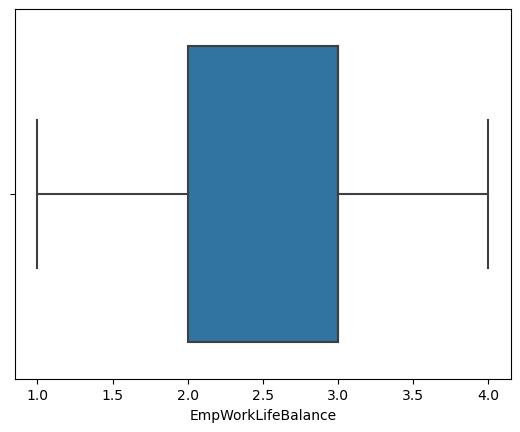

In [110]:
sns.boxplot(x=data['EmpWorkLifeBalance'])

- No ouliers in EmpWorkLifeBalance column

#### ExperienceYearsAtThisCompany

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

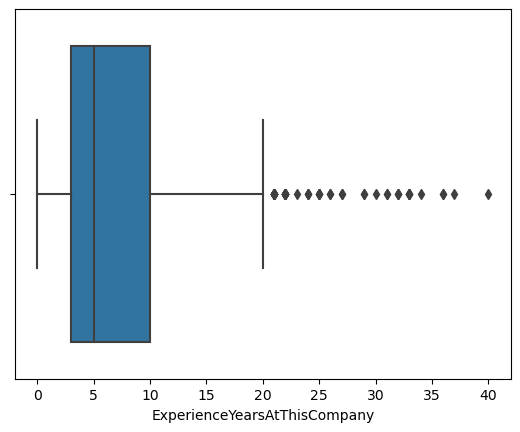

In [111]:
sns.boxplot(x=data['ExperienceYearsAtThisCompany'])

<AxesSubplot:ylabel='Density'>

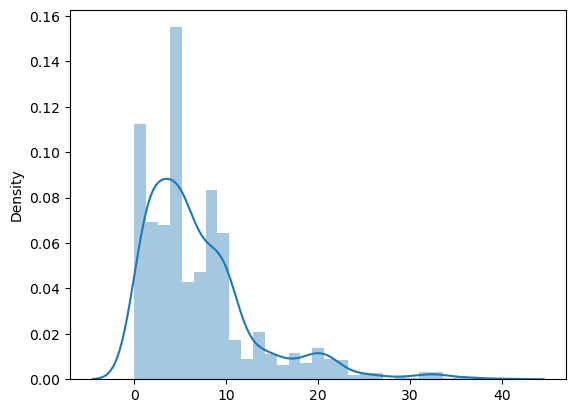

In [112]:
sns.distplot(x=data['ExperienceYearsAtThisCompany'],kde=True)

In [113]:
# since data is not normal we impute the outliers with IQR
Q1 = data['ExperienceYearsAtThisCompany'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['ExperienceYearsAtThisCompany'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 3.0
Q3 : 10.0
IQR : 7.0
lower_limit : -7.5
upper_limit : 20.5


In [114]:
data.loc[data['ExperienceYearsAtThisCompany']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [115]:
data.loc[data['ExperienceYearsAtThisCompany']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3             3   41       1                    6              3   
11           11   47       2                    2              3   
25           25   52       1                    3              1   
52           52   47       2                    5              1   
100         100   50       1                    1              3   
168         168   39       2                    1              1   
175         175   41       2                    1              3   
178         178   52       2                    3              1   
181         181   39       2                    2              2   
216         216   42       1                    2              1   
252         252   42       1                    1              2   
272         272   46       2                    3              1   
304         304   44       1                    3              1   
307         307   45       2                    3              2   
308         308   55       1                    2              3   
312         312   51       1                    1              3   
316         316   44       1                    1              3   
320         320   43       2                    3              2   
347         347   51       1                    1              3   
450         450   50       1                    2              2   
459         459   40       1                    2              2   
471         471   53       2                    4              1   
475         475   55       1                    3              1   
490         490   50       1                    2              1   
492         492   44       2                    2              3   
555         555   45       1                    1              1   
557         557   45       2                    4              2   
571         571   40       1                    2              2   
613         613   41       2                    3              3   
617         617   47       2                    1              3   
642         642   48       1                    1              1   
658         658   48       2                    2              3   
777         777   53       2                    1              1   
785         785   44       2                    2              1   
816         816   50       2                    2              3   
817         817   59       2                    1              2   
838         838   40       1                    1              1   
845         845   58       1                    2              2   
862         862   43       1                    1              1   
867         867   58       2                    2              1   
911         911   46       2                    3              3   
921         921   52       1                    1              1   
956         956   42       1                    4              1   
962         962   52       1                    1              2   
978         978   40       1                    2              3   
989         989   55       1                    2              2   
1015       1015   41       1                    1              2   
1024       1024   45       1                    1              3   
1027       1027   39       1                    2              1   
1036       1036   39       1                    2              1   
1086       1086   43       1                    1              3   
1094       1094   39       1                    1              3   
1104       1104   60       2                    1              1   
1117       1117   50       1                    1              1   
1156       1156   49       1                    1              3   
1160       1160   50       1                    2              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 4           8                    

In [116]:
data.loc[data['ExperienceYearsAtThisCompany']>upper_limit].shape

(56, 28)

In [117]:
data.shape

(1200, 28)

In [118]:
56/1200*100

4.666666666666667

In [119]:
data.loc[data['ExperienceYearsAtThisCompany']>upper_limit,'ExperienceYearsAtThisCompany']=data['ExperienceYearsAtThisCompany'].median()

In [120]:
data.loc[data['ExperienceYearsAtThisCompany']>upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### ExperienceYearsInCurrentRole

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole'>

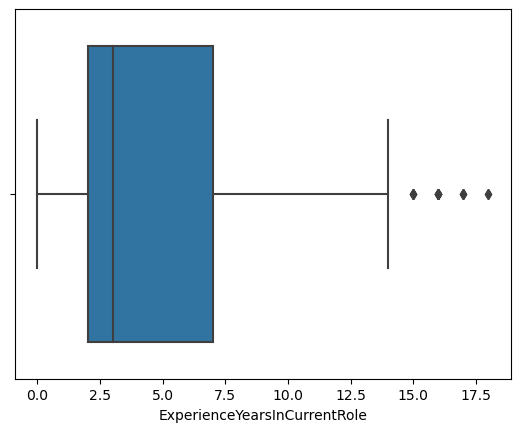

In [121]:
sns.boxplot(x=data['ExperienceYearsInCurrentRole'])

<AxesSubplot:ylabel='Density'>

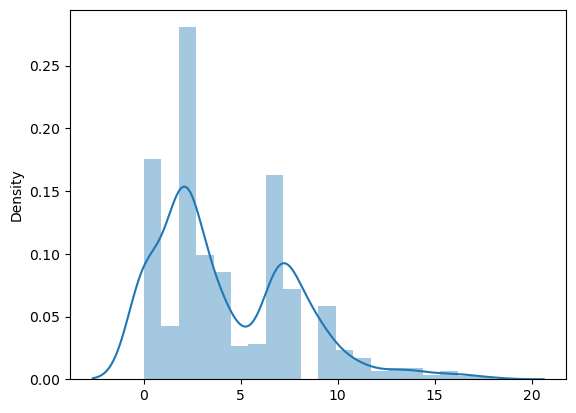

In [122]:
sns.distplot(x=data['ExperienceYearsInCurrentRole'],kde=True)

In [123]:
# since data is not normal we impute the outliers with IQR
Q1 = data['ExperienceYearsInCurrentRole'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['ExperienceYearsInCurrentRole'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 2.0
Q3 : 7.0
IQR : 5.0
lower_limit : -5.5
upper_limit : 14.5


In [124]:
data.loc[data['ExperienceYearsInCurrentRole']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [125]:
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
151         151   41       1                    2              3   
175         175   41       2                    1              3   
272         272   46       2                    3              1   
361         361   56       1                    1              1   
501         501   35       1                    1              1   
555         555   45       1                    1              1   
639         639   46       2                    4              3   
658         658   48       2                    2              3   
730         730   38       2                    2              1   
817         817   59       2                    1              2   
864         864   51       1                    1              2   
921         921   52       1                    1              1   
956         956   42       1                    4              1   
999         999   42       1                    1              1   
1109       1109   40       2                    1              1   
1152       1152   41       2                    1              1   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151               2           3                        1                 9   
175               3          11                        2                 7   
272               1           8                        0                 2   
361               3           9                        0                23   
501               5           4                        0                18   
555               3           9                        2                 1   
639               1          13                        0                 3   
658               3           8                        1                22   
730               3          11                        0                10   
817               1          13                        0                25   
864               2           3                        0                 6   
921               2           3                        0                 1   
956               2           3                        0                 4   
999               1          13                        0                 1   
1109              1           8                        0                 2   
1152              1           8                        0                 2   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
151                   3  ...                            2   
175                   1  ...                            2   
272                   3  ...                            1   
361                   3  ...                            1   
501                   5  ...                            4   
555                   1  ...                            4   
639                   3  ...                            4   
658                   3  ...                            2   
730                   3  ...                            1   
817                   3  ...                            4   
864                   3  ...                            3   
921                   4  ...                            1   
956                   2  ...                            4   
999                   1  ...                            3   
1109                  4  ...                            4   
1152                  5  ...                            2   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
151                           21                      2                   4   
175                           21                      3                   3   
272                           28                      2                   3   
361                           10                      3                   3   
501                           16                      2                   3   
555       

In [126]:
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit].shape

(16, 28)

In [127]:
data.shape

(1200, 28)

In [128]:
16/1200*100

1.3333333333333335

In [129]:
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit,'ExperienceYearsInCurrentRole']= data['ExperienceYearsInCurrentRole'].median()

In [130]:
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### YearsSinceLastPromotion

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

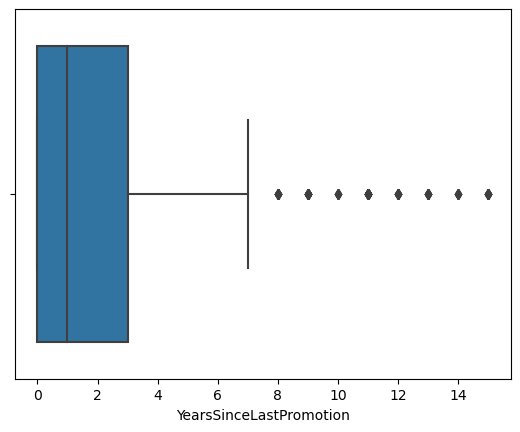

In [131]:
sns.boxplot(x=data['YearsSinceLastPromotion'])

<AxesSubplot:ylabel='Density'>

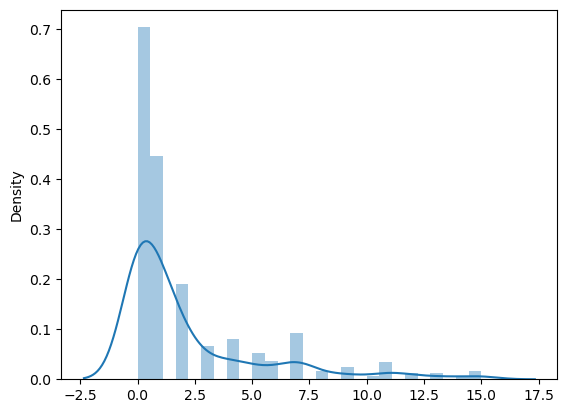

In [132]:
sns.distplot(x=data['YearsSinceLastPromotion'],kde=True)

In [133]:
# since data is not normal we impute the outliers with IQR
Q1 = data['YearsSinceLastPromotion'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['YearsSinceLastPromotion'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 0.0
Q3 : 3.0
IQR : 3.0
lower_limit : -4.5
upper_limit : 7.5


In [134]:
data.loc[data['YearsSinceLastPromotion']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [135]:
data.loc[data['YearsSinceLastPromotion']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
3             3   41       1                    6              3   
11           11   47       2                    2              3   
100         100   50       1                    1              3   
130         130   31       2                    2              1   
132         132   37       1                    1              1   
...         ...  ...     ...                  ...            ...   
1152       1152   41       2                    1              1   
1160       1160   50       1                    2              1   
1181       1181   34       1                    1              1   
1185       1185   35       1                    1              2   
1189       1189   33       1                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3                 4           8                        0                10   
11                1          13                        1                 3   
100               2           3                        2                 2   
130               2           3                        0                12   
132               1          13                        0                 1   
...             ...         ...                      ...               ...   
1152              1           8                        0                 2   
1160              4           8                        1                 3   
1181              2          15                        0                 1   
1185              2          15                        0                 6   
1189              2          15                        1                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
3                     4  ...                            2   
11                    3  ...                            4   
100                   4  ...                            4   
130                   3  ...                            3   
132                   4  ...                            3   
...                 ...  ...                          ...   
1152                  5  ...                            2   
1160                  3  ...                            3   
1181                  5  ...                            4   
1185                  4  ...                            2   
1189                  3  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
3                             23                      2                   2   
11                            28                      2                   2   
100                           10                      3                   3   
130                           10                      2                   1   
132                           17                      2                   1   
...                          ...                    ...                 ...   
1152                          22                      2                   3   
1160                          10                      2                   3   
1181                          10                      4                   2   
1185                          17                      3                   3   
1189                          10                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
3                                5                             6   
11                               5                             2   
100                              5                             6   
130                              9                             7   
132                             14                             1   
...                            ...                           ...   
1152                            18                             3   
1160                      

In [136]:
88/1200*100

7.333333333333333

- Since there are more than 5% outliers in YearsSinceLastPromotion column we do not impute the values

#### YearsWithCurrManager

<AxesSubplot:xlabel='YearsWithCurrManager'>

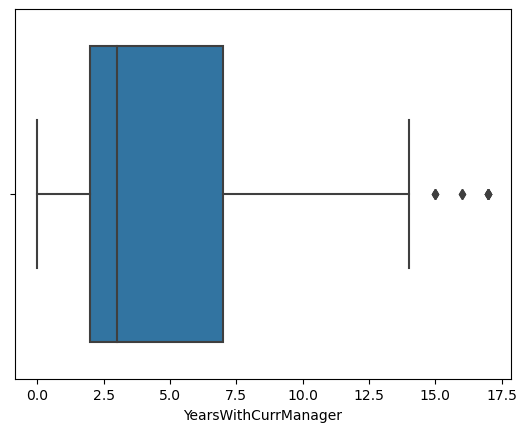

In [137]:
sns.boxplot(x=data['YearsWithCurrManager'])

<AxesSubplot:ylabel='Density'>

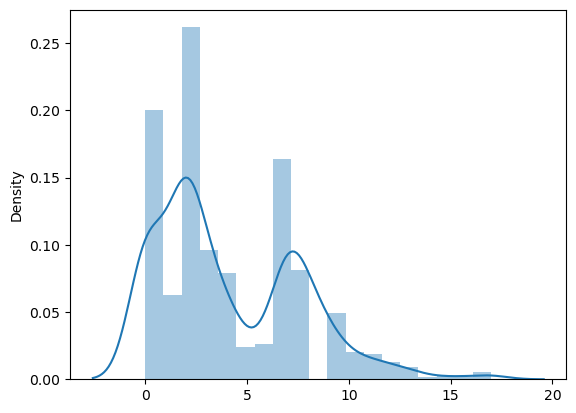

In [138]:
sns.distplot(x=data['YearsWithCurrManager'],kde=True)

In [139]:
# since data is not normal we impute the outliers with IQR
Q1 = data['YearsWithCurrManager'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['YearsWithCurrManager'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 2.0
Q3 : 7.0
IQR : 5.0
lower_limit : -5.5
upper_limit : 14.5


In [140]:
data.loc[data['YearsWithCurrManager']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [141]:
data.loc[data['YearsWithCurrManager']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
25           25   52       1                    3              1   
72           72   51       2                    3              1   
126         126   41       1                    2              2   
283         283   44       1                    5              2   
320         320   43       2                    3              2   
655         655   40       1                    1              3   
785         785   44       2                    2              1   
864         864   51       1                    1              2   
888         888   45       1                    1              3   
956         956   42       1                    4              1   
1083       1083   37       2                    1              3   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25                1           8                        0                 3   
72                1           8                        0                26   
126               2           3                        0                 6   
283               3          12                        0                29   
320               1          13                        0                 4   
655               3           9                        0                 1   
785               2           3                        0                 7   
864               2           3                        0                 6   
888               2           3                        0                 9   
956               2           3                        0                 4   
1083              2           2                        0                14   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
25                    4  ...                            1   
72                    4  ...                            3   
126                   3  ...                            3   
283                   4  ...                            2   
320                   4  ...                            4   
655                   4  ...                            1   
785                   4  ...                            4   
864                   3  ...                            3   
888                   3  ...                            3   
956                   2  ...                            4   
1083                  3  ...                            3   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
25                            10                      3                   4   
72                            10                      2                   2   
126                           20                      3                   3   
283                           20                      3                   3   
320                           23                      3                   4   
655                           22                      3                   3   
785                           24                      4                   3   
864                           23                      5                   3   
888                           20                      2                   1   
956                           22                      3                   3   
1083                          18                      2                   2   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
25                               5                             6   
72                              20                             6   
126                             18                            13   
283                             20                            11   
320                              5                             7   
655                             19                             7   
785                              5                             6   
864                       

In [142]:
11/1200*100

0.9166666666666666

In [143]:
data.loc[data['YearsWithCurrManager']>upper_limit,'YearsWithCurrManager']= data['YearsWithCurrManager'].median()

In [144]:
data.loc[data['YearsWithCurrManager']>upper_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

#### Attrition

<AxesSubplot:xlabel='Attrition'>

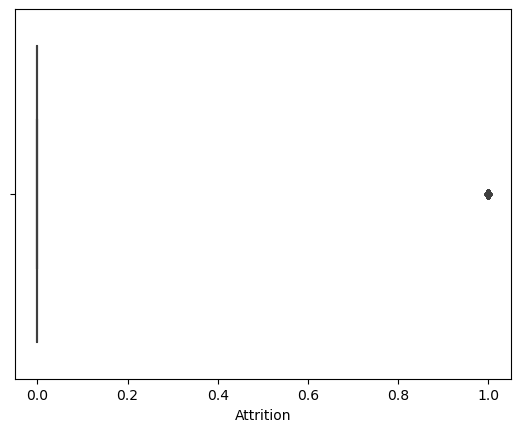

In [145]:
sns.boxplot(x=data['Attrition'])

<AxesSubplot:ylabel='Density'>

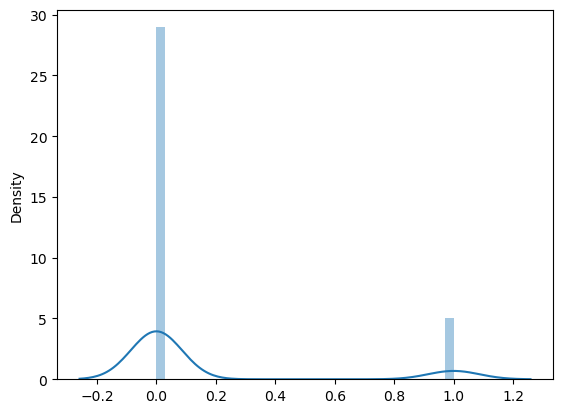

In [146]:
sns.distplot(x=data['Attrition'],kde=True)

In [147]:
# since data is not normal we impute the outliers with IQR
Q1 = data['Attrition'].quantile(0.25)
print('Q1 :',Q1)
Q3 = data['Attrition'].quantile(0.75)
print('Q3 :',Q3)
IQR = Q3-Q1
print('IQR :',IQR)
lower_limit = Q1-1.5*IQR
print('lower_limit :',lower_limit)
upper_limit = Q3+1.5*IQR
print('upper_limit :',upper_limit)

Q1 : 0.0
Q3 : 0.0
IQR : 0.0
lower_limit : 0.0
upper_limit : 0.0


In [148]:
data.loc[data['Attrition']<lower_limit]

Empty DataFrame
Columns: [EmpNumber, Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

[0 rows x 28 columns]

In [149]:
data.loc[data['Attrition']>upper_limit]

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  \
7             7   28       2                    1              2   
14           14   42       1                    2              3   
26           26   33       1                    5              2   
30           30   47       2                    1              2   
36           36   26       1                    4              2   
...         ...  ...     ...                  ...            ...   
1164       1164   31       1                    2              3   
1175       1175   27       1                    3              3   
1188       1188   20       1                    2              2   
1189       1189   33       1                    1              2   
1199       1199   24       2                    1              2   

      EmpDepartment  EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
7                 2           3                        0                 1   
14                2           3                        1                19   
26                2           3                        0                 1   
30                1          13                        1                27   
36                1          13                        0                 8   
...             ...         ...                      ...               ...   
1164              1          13                        0                13   
1175              1          14                        0                 2   
1188              2          15                        0                10   
1189              2          15                        1                 3   
1199              1          13                        0                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
7                     2  ...                            4   
14                    3  ...                            4   
26                    4  ...                            3   
30                    2  ...                            4   
36                    3  ...                            3   
...                 ...  ...                          ...   
1164                  4  ...                            3   
1175                  1  ...                            2   
1188                  1  ...                            4   
1189                  3  ...                            1   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
7                             10                      4                   3   
14                             7                      2                   3   
26                            10                      2                   2   
30                             8                      2                   3   
36                             6                      2                   2   
...                          ...                    ...                 ...   
1164                           9                      2                   1   
1175                           5                      3                   3   
1188                           1                      5                   3   
1189                          10                      3                   3   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
7                                7                             7   
14                               2                             2   
26                              10                             9   
30                               5                             4   
36                               4                             3   
...                            ...                           ...   
1164                             3                             1   
1175                      

In [150]:
178/1200*100

14.833333333333334

- The outlier is above 14% hence we do not impute values

## Feature Engineering

In [151]:
data.corr()

EmpNumber       Age    Gender  \
EmpNumber                      1.000000 -0.053137 -0.025922   
Age                           -0.053137  1.000000  0.040107   
Gender                        -0.025922  0.040107  1.000000   
EducationBackground            0.003069 -0.049544 -0.021775   
MaritalStatus                  0.016902 -0.028983 -0.013286   
EmpDepartment                 -0.111758  0.042295 -0.024570   
EmpJobRole                    -0.044182 -0.037665 -0.011332   
BusinessTravelFrequency       -0.050270 -0.040579 -0.043608   
DistanceFromHome              -0.023405  0.020937  0.001507   
EmpEducationLevel              0.005844  0.207313  0.022960   
EmpEnvironmentSatisfaction    -0.041013  0.013814 -0.000033   
EmpHourlyRate                  0.019351  0.062867 -0.002218   
EmpJobInvolvement              0.015400  0.027216 -0.010949   
EmpJobLevel                    0.000275  0.509139  0.050685   
EmpJobSatisfaction             0.041143 -0.002436 -0.024680   
NumCompaniesWorked            -0.045983  0.300805  0.043927   
OverTime                       0.007214  0.051910  0.038410   
EmpLastSalaryHikePercent      -0.017925 -0.006105  0.005319   
EmpRelationshipSatisfaction    0.033013  0.049749 -0.030707   
TotalWorkExperienceInYears     0.017094  0.559662  0.060534   
TrainingTimesLastYear          0.004900 -0.014500  0.048542   
EmpWorkLifeBalance             0.006075 -0.019563 -0.015793   
ExperienceYearsAtThisCompany  -0.016742  0.176752  0.053683   
ExperienceYearsInCurrentRole  -0.010215  0.185951  0.023985   
YearsSinceLastPromotion        0.004240  0.228199  0.021575   
YearsWithCurrManager           0.017907  0.187042  0.039737   
Attrition                     -0.020210 -0.189317 -0.035758   
PerformanceRating             -0.003163 -0.040164  0.001780   

                              EducationBackground  MaritalStatus  \
EmpNumber                                0.003069       0.016902   
Age                                     -0.049544      -0.028983   
Gender                                  -0.021775      -0.013286   
EducationBackground                      1.000000      -0.012716   
MaritalStatus                           -0.012716       1.000000   
EmpDepartment                            0.024661       0.018313   
EmpJobRole                               0.034294      -0.033041   
BusinessTravelFrequency                 -0.011023       0.087524   
DistanceFromHome                         0.003118      -0.015542   
EmpEducationLevel                        0.038661      -0.003130   
EmpEnvironmentSatisfaction               0.045680       0.042945   
EmpHourlyRate                           -0.048646      -0.010802   
EmpJobInvolvement                       -0.026778      -0.004670   
EmpJobLevel                             -0.020433      -0.006755   
EmpJobSatisfaction                      -0.063059      -0.028628   
NumCompaniesWorked                      -0.007075       0.050030   
OverTime                                 0.019592       0.021658   
EmpLastSalaryHikePercent                -0.012867      -0.010378   
EmpRelationshipSatisfaction              0.007259       0.052917   
TotalWorkExperienceInYears              -0.007951       0.012136   
TrainingTimesLastYear                   -0.018237       0.039582   
EmpWorkLifeBalance                       0.030417       0.002060   
ExperienceYearsAtThisCompany             0.003541      -0.027914   
ExperienceYearsInCurrentRole             0.013586      -0.018488   
YearsSinceLastPromotion                 -0.020661      -0.016567   
YearsWithCurrManager                    -0.003503       0.000105   
Attrition                                0.068427       0.028260   
PerformanceRating                        0.010804       0.039682   

                              EmpDepartment  EmpJobRole  \
EmpNumber                         -0.111758   -0.044182   
Age                                0.042295   -0.037665   
Gender                            -0.024570   -0.011

<AxesSubplot:>

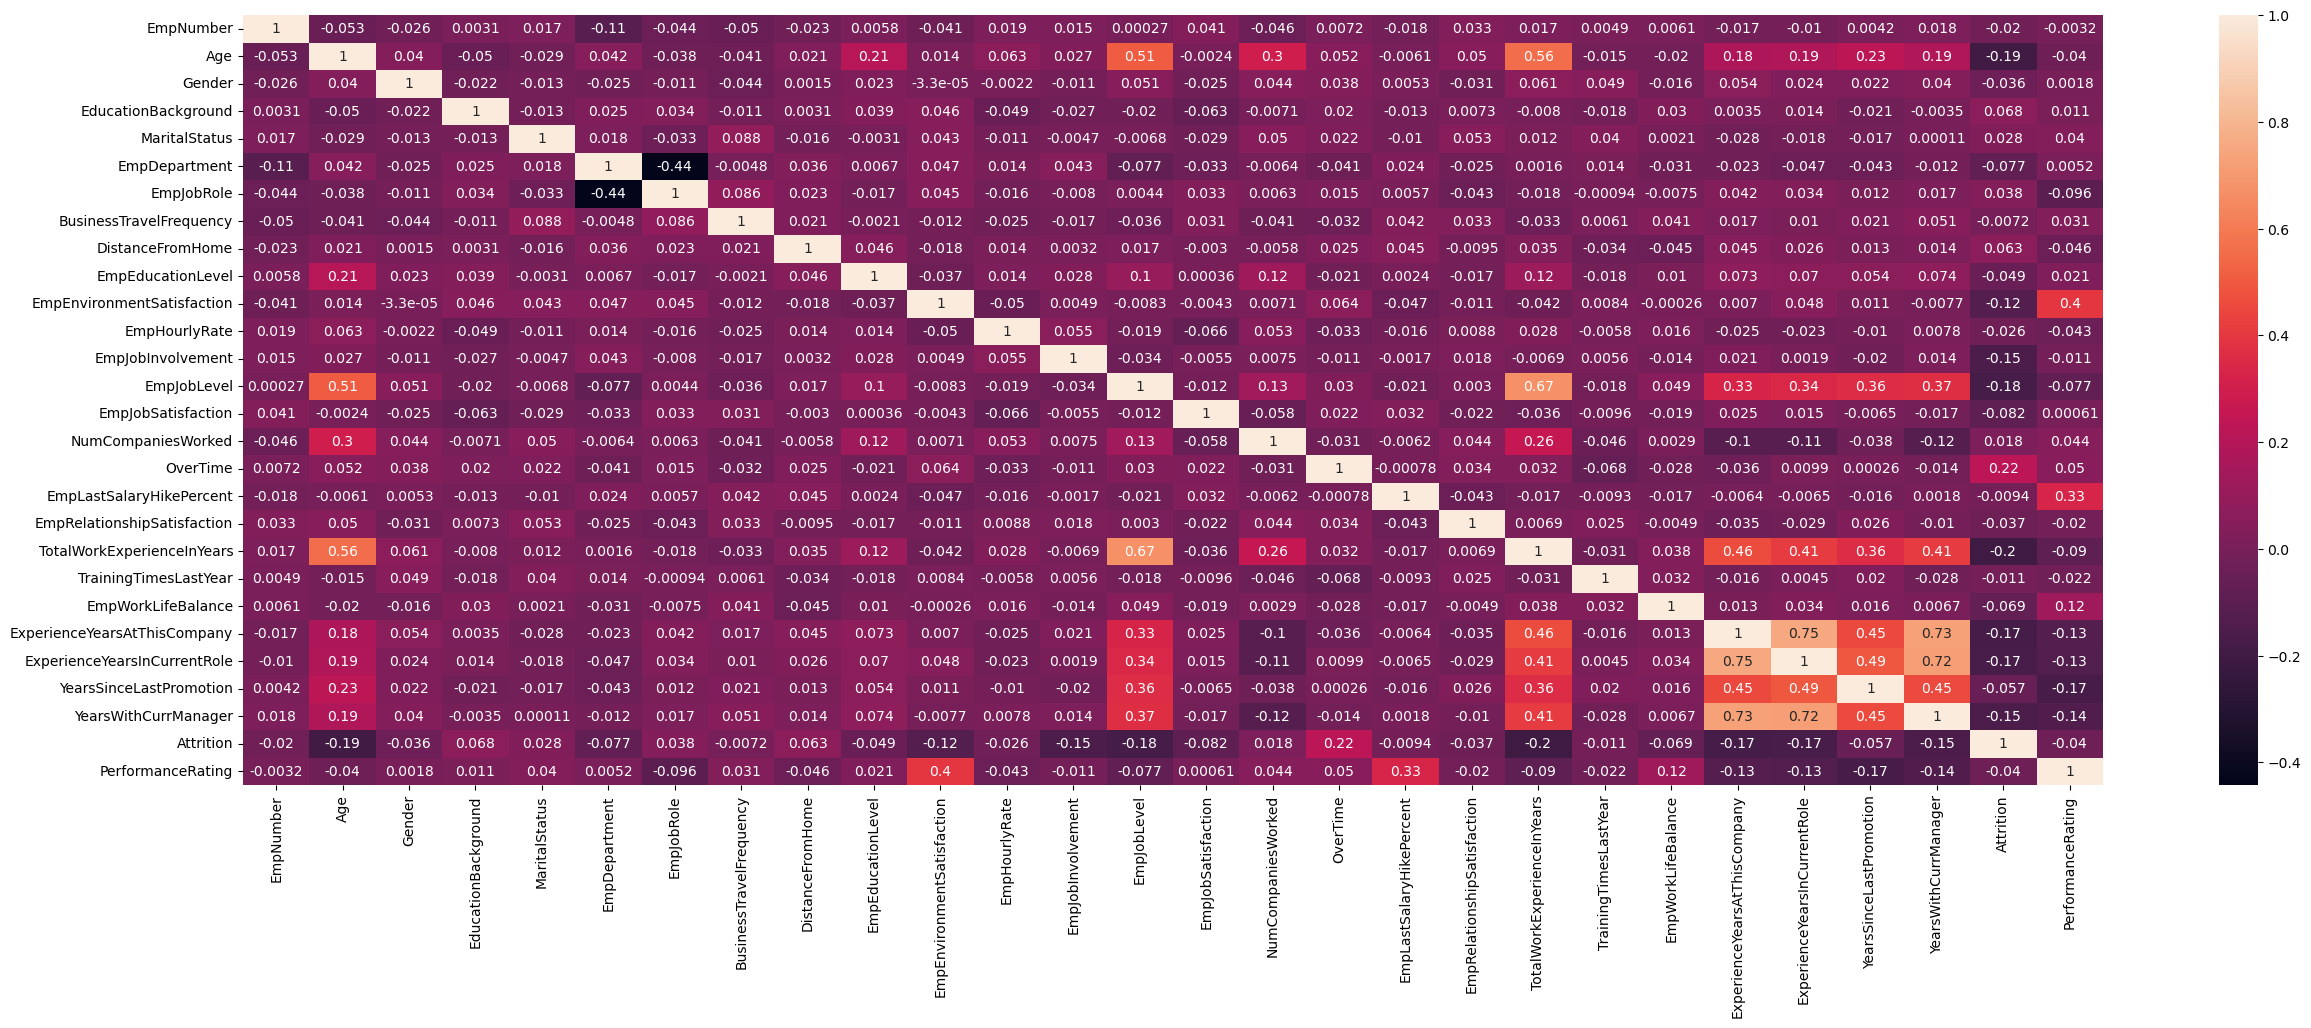

In [152]:
plt.figure(figsize=(30,10))
sns.heatmap(data.corr(),annot=True)

- We do not drop columns as they do not have highly co related columns

In [153]:
x= data.drop(['PerformanceRating','EmpNumber'],axis=1)
Y= data.PerformanceRating

## splitting of train and test data

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state=2,test_size=0.20)

In [156]:
x_train.shape

(960, 26)

In [157]:
x_test.shape

(240, 26)

## Model creation

- Since the target column is discrete we can use classification algorithms

## Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression

In [159]:
model_log = LogisticRegression()

In [160]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [161]:
y_pred_log_test = model_log.predict(x_test)

In [162]:
y_pred_log_train = model_log.predict(x_train)

## Evaluation of Logistic Regression

In [225]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [222]:
accuracy_score(y_test,y_pred_log_test)

0.7458333333333333

In [249]:
accuracy_score(y_train,y_pred_log_train)

0.7947916666666667

In [223]:
print(classification_report(y_test,y_pred_log_test))

              precision    recall  f1-score   support

           2       0.63      0.47      0.54        40
           3       0.81      0.89      0.85       169
           4       0.39      0.29      0.33        31

    accuracy                           0.75       240
   macro avg       0.61      0.55      0.57       240
weighted avg       0.72      0.75      0.73       240



In [226]:
confusion_matrix(y_test,y_pred_log_test)

array([[ 19,  18,   3],
       [  7, 151,  11],
       [  4,  18,   9]], dtype=int64)

In [229]:
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           2       0.62      0.46      0.53       154
           3       0.83      0.91      0.87       705
           4       0.66      0.50      0.56       101

    accuracy                           0.79       960
   macro avg       0.70      0.62      0.65       960
weighted avg       0.78      0.79      0.78       960



- The accuracy of train data is 79% for logistic regression
- The accuracy of test data is about 75% for logistic regression

## K- Nearest neighbors

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
error_rate=[]
for i in range(1,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    y_pred_knn = model_knn.predict(x_test)
    error_rate.append(np.mean(y_pred_knn!=y_test))
error_rate

[0.35833333333333334,
 0.4041666666666667,
 0.36666666666666664,
 0.3458333333333333,
 0.32083333333333336,
 0.30833333333333335,
 0.32083333333333336,
 0.31666666666666665,
 0.325,
 0.31666666666666665]

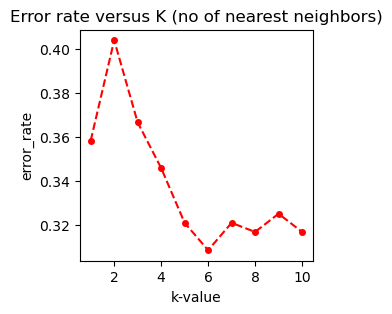

In [180]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [230]:
model_knn = KNeighborsClassifier(n_neighbors=6)

In [231]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [232]:
y_pred_knn_test = model_knn.predict(x_test)

In [233]:
y_pred_knn_train = model_knn.predict(x_train)

## Evaluation of K-Nearest Neighbors

In [234]:
print(classification_report(y_test,y_pred_knn_test))

              precision    recall  f1-score   support

           2       0.44      0.20      0.28        40
           3       0.73      0.93      0.82       169
           4       0.17      0.03      0.05        31

    accuracy                           0.69       240
   macro avg       0.45      0.39      0.38       240
weighted avg       0.61      0.69      0.63       240



In [235]:
print(classification_report(y_train,y_pred_knn_train))

              precision    recall  f1-score   support

           2       0.57      0.33      0.42       154
           3       0.79      0.96      0.87       705
           4       0.90      0.18      0.30       101

    accuracy                           0.77       960
   macro avg       0.76      0.49      0.53       960
weighted avg       0.77      0.77      0.73       960



- K-Nearest Neighbors have about 69% accuracy for test data
- K-Nearest Neighbors have about 77% accuracy for train data

## Support vector classifier

In [190]:
from sklearn.svm import SVC

In [191]:
model_svc = SVC()

In [192]:
model_svc.fit(x_train,y_train)

SVC()

In [193]:
y_pred_svc_test = model_svc.predict(x_test)

In [194]:
y_pred_svc_train = model_svc.predict(x_train)

## Evalution of Support vector classifier

In [236]:
print(classification_report(y_test,y_pred_svc_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00        40
           3       0.70      1.00      0.83       169
           4       0.00      0.00      0.00        31

    accuracy                           0.70       240
   macro avg       0.23      0.33      0.28       240
weighted avg       0.50      0.70      0.58       240



In [196]:
print(classification_report(y_train,y_pred_knn_train))

              precision    recall  f1-score   support

           2       0.60      0.35      0.44       154
           3       0.81      0.96      0.88       705
           4       0.84      0.26      0.39       101

    accuracy                           0.79       960
   macro avg       0.75      0.52      0.57       960
weighted avg       0.78      0.79      0.76       960



- train data is 79% with support vector classifier
- test data is 70% with support vector classifier

## RandomForest Classifier

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
model_rf = RandomForestClassifier()

In [218]:
model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [219]:
y_pred_model_rf_test = model_rf.predict(x_test)

In [220]:
y_pred_model_rf_train = model_rf.predict(x_train)

In [237]:
print(classification_report(y_train,y_pred_model_rf_train))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       705
           4       1.00      1.00      1.00       101

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



In [238]:
print(classification_report(y_test,y_pred_model_rf_test))

              precision    recall  f1-score   support

           2       0.90      0.95      0.93        40
           3       0.93      0.98      0.95       169
           4       0.95      0.65      0.77        31

    accuracy                           0.93       240
   macro avg       0.93      0.86      0.88       240
weighted avg       0.93      0.93      0.93       240



- 93% of accuracy for random forest with test data
- 100% accuracy for random forest with train data

## GradientBoosting Classifier

In [239]:
from sklearn.ensemble import GradientBoostingClassifier

In [240]:
model_gb_classifier = GradientBoostingClassifier()

In [241]:
model_gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier()

In [242]:
y_pred_gb_test = model_gb_classifier.predict(x_test)

In [243]:
y_pred_gb_train = model_gb_classifier.predict(x_train)

In [244]:
print(classification_report(y_test,y_pred_gb_test))

              precision    recall  f1-score   support

           2       0.88      0.95      0.92        40
           3       0.94      0.96      0.95       169
           4       0.88      0.71      0.79        31

    accuracy                           0.93       240
   macro avg       0.90      0.87      0.88       240
weighted avg       0.92      0.93      0.92       240



In [245]:
print(classification_report(y_train,y_pred_gb_train))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99       154
           3       1.00      1.00      1.00       705
           4       1.00      0.99      1.00       101

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



- 93% of accuracy of test data with gradient boosting classifier
- 100% of accuracy of train data with gradient boosting classifier

## Analysis

### using logistic regression:
- The accuracy of train data is 79% for logistic regression
- The accuracy of test data is about 75% for logistic regression
### using KNN Classifier:
- K-Nearest Neighbors have about 69% accuracy for test data
- K-Nearest Neighbors have about 77% accuracy for train data
### using Support vector classifier:
- train data is 79% with support vector classifier
- test data is 70% with support vector classifier
### using Random Forest Classifier:
- 93% of accuracy for random forest with test data
- 100% accuracy for random forest with train data
### using Gradient boosting Classifier:
- 93% of accuracy of test data with gradient boosting classifier
- 100% of accuracy of train data with gradient boosting classifier

## Conclusion

- The best algorithms to be applied to this dataset are Random  Forest classifier and Gradient Boosting Classifier

- Out of these two we can choose Random Forest Classifier as the best algorithm